# 🤖 NewsBot Intelligence System
## ITAI 2373 - Mid-Term Group Project Template

**Team Members:** [Add your names here]
**Date:** [Add date]
**GitHub Repository:** [Add your repo URL here]

---

## 🎯 Project Overview

Welcome to your NewsBot Intelligence System! This notebook will guide you through building a comprehensive NLP system that:

- 📰 **Processes** news articles with advanced text cleaning
- 🏷️ **Classifies** articles into categories (Politics, Sports, Technology, Business, Entertainment, Health)
- 🔍 **Extracts** named entities (people, organizations, locations, dates, money)
- 😊 **Analyzes** sentiment and emotional tone
- 📊 **Generates** insights for business intelligence

### 📚 Module Integration Checklist
- [ ] **Module 1:** NLP applications and real-world context
- [ ] **Module 2:** Text preprocessing pipeline
- [ ] **Module 3:** TF-IDF feature extraction
- [ ] **Module 4:** POS tagging analysis
- [ ] **Module 5:** Syntax parsing and semantic analysis
- [ ] **Module 6:** Sentiment and emotion analysis
- [ ] **Module 7:** Text classification system
- [ ] **Module 8:** Named Entity Recognition

---

## 📦 Setup and Installation

Let's start by installing and importing all the libraries we'll need for our NewsBot system.

In [ ]:
# Install required packages (run this cell first!)
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter, defaultdict
from itertools import combinations
import networkx as nx
from textblob import TextBlob
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print(f"🔧 spaCy model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

📚 All libraries imported successfully!
🔧 spaCy model loaded: core_web_sm v3.8.0


## 📊 Data Loading and Exploration

### 🎯 Module 1: Understanding Our NLP Application

Before we dive into the technical implementation, let's understand the real-world context of our NewsBot Intelligence System. This system addresses several business needs:

1. **Media Monitoring:** Automatically categorize and track news coverage
2. **Business Intelligence:** Extract key entities and sentiment trends
3. **Content Management:** Organize large volumes of news content
4. **Market Research:** Understand public sentiment about topics and entities

**💡 Discussion Question:** What other real-world applications can you think of for this type of system? Consider different industries and use cases.

In [ ]:
# Load your dataset
# 💡 TIP: If using the provided dataset, upload it to Colab first
# 💡 TIP: You can also use sample datasets like BBC News or 20 Newsgroups

# Option 1: Load provided dataset
# df = pd.read_csv('news_dataset.csv')

# Option 2: Load BBC News dataset (if using alternative)
# You can download this from: https://www.kaggle.com/c/learn-ai-bbc/data
df = pd.read_csv('/content/BBC News Train.csv')
print(f"BBC Dataset from Kaggle:\n {df}")

# Option 3: Create sample data for testing (remove this when you have real data)
# sample_data = {
#     'article_id': range(1, 11),
#     'title': [
#         'Apple Inc. Reports Record Quarterly Earnings',
#         'Manchester United Defeats Chelsea 3-1',
#         'New AI Technology Revolutionizes Healthcare',
#         'President Biden Announces Climate Initiative',
#         'Netflix Releases New Original Series',
#         'Tesla Stock Rises After Production Update',
#         'Olympic Games Begin in Paris',
#         'Google Launches New Search Algorithm',
#         'Congress Passes Infrastructure Bill',
#         'Disney+ Subscriber Numbers Grow'
#     ],
#     'content': [
#         'Apple Inc. announced record quarterly earnings today, with CEO Tim Cook highlighting strong iPhone sales and services revenue growth.',
#         'Manchester United secured a convincing 3-1 victory over Chelsea at Old Trafford, with goals from Marcus Rashford and Bruno Fernandes.',
#         'A breakthrough AI system developed by researchers at Stanford University shows promise for early disease detection in medical imaging.',
#         'President Joe Biden unveiled a comprehensive climate change initiative aimed at reducing carbon emissions by 50% over the next decade.',
#         'Netflix premiered its latest original series to critical acclaim, featuring an ensemble cast and innovative storytelling techniques.',
#         'Tesla shares jumped 8% in after-hours trading following the company\'s announcement of increased production capacity at its Texas facility.',
#         'The 2024 Olympic Games officially began in Paris with a spectacular opening ceremony attended by world leaders and celebrities.',
#         'Google introduced a new search algorithm that promises more accurate and contextually relevant results for users worldwide.',
#         'The U.S. Congress passed a bipartisan infrastructure bill allocating $1.2 trillion for roads, bridges, and broadband expansion.',
#         'Disney+ reported strong subscriber growth in Q3, reaching 150 million subscribers globally across all markets.'
#     ],
#     'category': ['Business', 'Sports', 'Technology', 'Politics', 'Entertainment',
#                 'Business', 'Sports', 'Technology', 'Politics', 'Entertainment'],
#     'date': ['2024-01-15'] * 10,
#     'source': ['TechNews', 'SportsTimes', 'TechDaily', 'PoliticsToday', 'EntertainmentWeekly',
#               'BusinessWire', 'SportsCentral', 'TechReview', 'NewsNow', 'ShowBiz']
# }

# df = pd.DataFrame(sample_data)

print(f"📊 Dataset loaded successfully!")
print(f"📈 Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Display first few rows
df.head()

BBC Dataset from Kaggle:
       ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3              tech  
4          business  
.

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

📊 DATASET OVERVIEW
Total articles: 1490
Unique categories: 5
Categories: ['business', 'tech', 'politics', 'sport', 'entertainment']

📈 CATEGORY DISTRIBUTION
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


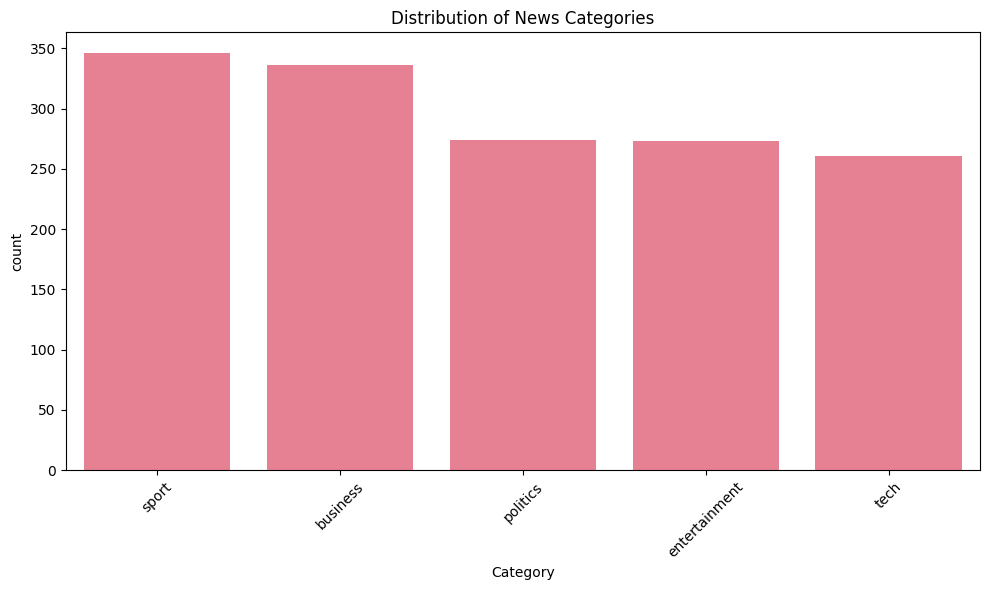

Missing Values:
ArticleId    0
Text         0
Category     0
dtype: int64

Text Length Distribution:
        text_length
count   1490.000000
mean    2233.461745
std     1205.153358
min      501.000000
25%     1453.000000
50%     1961.000000
75%     2751.250000
max    18387.000000

Duplicates:
0



In [ ]:
# Basic dataset exploration
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Total articles: {len(df)}")
print(f"Unique categories: {df['Category'].nunique()}")
print(f"Categories: {df['Category'].unique().tolist()}")

print("\n📈 CATEGORY DISTRIBUTION")
print("=" * 50)
category_counts = df['Category'].value_counts()
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=category_counts.index)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Add your own exploratory analysis here
# - Check for missing values
print(f"Missing Values:\n{df.isnull().sum()}\n")
# - Analyze text length distribution
new_df = df.copy()
new_df["text_length"] = df["Text"].apply(len)
print(f"Text Length Distribution:\n{new_df[['text_length']].describe()}\n")
# - Look for any data quality issues
#Check for Duplicates
print(f"Duplicates:\n{df.duplicated().sum()}\n")

## 🧹 Text Preprocessing Pipeline

### 🎯 Module 2: Advanced Text Preprocessing

Now we'll implement a comprehensive text preprocessing pipeline that cleans and normalizes our news articles. This is crucial for all downstream NLP tasks.

**Key Preprocessing Steps:**
1. **Text Cleaning:** Remove HTML, URLs, special characters
2. **Tokenization:** Split text into individual words
3. **Normalization:** Convert to lowercase, handle contractions
4. **Stop Word Removal:** Remove common words that don't carry meaning
5. **Lemmatization:** Reduce words to their base form

**💡 Think About:** Why is preprocessing so important? What happens if we skip these steps?

In [ ]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Comprehensive text cleaning function

    💡 TIP: This function should handle:
    - HTML tags and entities
    - URLs and email addresses
    - Special characters and numbers
    - Extra whitespace
    """
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # 🚀 YOUR CODE HERE: Implement text cleaning
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    """
    Complete preprocessing pipeline

    💡 TIP: This function should:
    - Clean the text
    - Tokenize into words
    - Remove stop words (optional)
    - Lemmatize words (optional)
    - Return processed text
    """
    # Clean text
    text = clean_text(text)

    if not text:
        return ""

    # 🚀 YOUR CODE HERE: Implement tokenization and preprocessing
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words if requested
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize if requested
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Filter out very short words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)

# Test the preprocessing function
sample_text = "Apple Inc. announced record quarterly earnings today! Visit https://apple.com for more info. #TechNews"
print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(clean_text(sample_text))
print("\nFully preprocessed text:")
print(preprocess_text(sample_text))

Original text:
Apple Inc. announced record quarterly earnings today! Visit https://apple.com for more info. #TechNews

Cleaned text:
apple inc announced record quarterly earnings today visit for more info technews

Fully preprocessed text:
apple inc announced record quarterly earnings today visit info technews


In [ ]:
# Apply preprocessing to the dataset
print("🧹 Preprocessing all articles...")

# Create new column for cleaned text
df['text_clean'] = df['Text'].apply(clean_text)

# Create new column for processed text
df['text_processed'] = df['text_clean'].apply(preprocess_text)

print("✅ Preprocessing complete!")

# Show before and after examples
print("\n📝 BEFORE AND AFTER EXAMPLES")
print("=" * 60)
for i in range(min(3, len(df))):
    print(f"\nExample {i+1}:")
    print(f"Original: {df.iloc[i]['Text'][:100]}...")
    print(f"Processed: {df.iloc[i]['text_processed'][:100]}...")

# 💡 STUDENT TASK: Analyze the preprocessing results
# - Calculate average text length before and after
print("\n📊 AVG TEXT LENGTH BEFORE AND AFTER")
print("=" * 60)
new_df['text_avg'] = df["text_clean"].apply(len)
new_df['text_processed_avg'] = df['text_processed'].apply(len)
print(f"Full text avg before:\n\n{new_df[['text_avg']].describe()}\n")
print(f"Full text processed avg after:\n\n{new_df[['text_processed_avg']].describe()}\n")
# - Count unique words before and after
print("\n📊 UNIQUE WORDS BEFORE AND AFTER")
print("=" * 60)
new_df['unique_text_words'] = df['text_clean'].apply(lambda x: len(set(x.split())))
new_df['unique_text_processed_words'] = df['text_processed'].apply(lambda x: len(set(x.split())))
print(f"Unique words full text before:\n\n{new_df[['unique_text_words']]}\n")
print(f"Unique words full text processed after:\n\n{new_df[['unique_text_processed_words']]}\n")
# - Identify the most common words after preprocessing
print("\n📊 MOST COMMON WORDS AFTER PREPROCESSING")
print("=" * 60)
common_words = Counter(' '.join(df['text_processed']).split()).most_common(10)
for word in common_words:
    print(f"{word[0]}: {word[1]}")

🧹 Preprocessing all articles...
✅ Preprocessing complete!

📝 BEFORE AND AFTER EXAMPLES

Example 1:
Original: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...
Processed: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud ch...

Example 2:
Original: german business confidence slides german business confidence fell in february knocking hopes of a sp...
Processed: german business confidence slide german business confidence fell february knocking hope speedy recov...

Example 3:
Original: bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...
Processed: bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe wo...

📊 AVG TEXT LENGTH BEFORE AND AFTER
Full text avg before:

           text_avg
count   1490.000000
mean    2145.694631
std     1164.485112
min      489.000000
25%     1388.250000
50%     188

## 📊 Feature Extraction and Statistical Analysis

### 🎯 Module 3: TF-IDF Analysis

Now we'll extract numerical features from our text using TF-IDF (Term Frequency-Inverse Document Frequency). This technique helps us identify the most important words in each document and across the entire corpus.

**TF-IDF Key Concepts:**
- **Term Frequency (TF):** How often a word appears in a document
- **Inverse Document Frequency (IDF):** How rare a word is across all documents
- **TF-IDF Score:** TF × IDF - balances frequency with uniqueness

**💡 Business Value:** TF-IDF helps us identify the most distinctive and important terms for each news category.

In [ ]:
# Create TF-IDF vectorizer
# 💡 TIP: Experiment with different parameters:
# - max_features: limit vocabulary size
# - ngram_range: include phrases (1,1) for words, (1,2) for words+bigrams
# - min_df: ignore terms that appear in less than min_df documents
# - max_df: ignore terms that appear in more than max_df fraction of documents

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary for computational efficiency
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.8  # Ignore terms that appear in more than 80% of documents
)

# Fit and transform the processed text
print("🔢 Creating TF-IDF features...")
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"✅ TF-IDF matrix created!")
print(f"📊 Shape: {tfidf_matrix.shape}")
print(f"📝 Vocabulary size: {len(feature_names)}")
print(f"🔢 Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['Category'] = df['Category'].values

print("\n🔍 Sample TF-IDF features:")
print(tfidf_df.iloc[:3, :10])  # Show first 3 rows and 10 features

🔢 Creating TF-IDF features...
✅ TF-IDF matrix created!
📊 Shape: (1490, 5000)
📝 Vocabulary size: 5000
🔢 Sparsity: 97.50%

🔍 Sample TF-IDF features:
   abbas  abc  ability  able  abroad  absence  absolute  absolutely  abuse  \
0    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
1    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
2    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   

   abused  
0     0.0  
1     0.0  
2     0.0  


🏷️ TOP TF-IDF TERMS BY CATEGORY

📰 BUSINESS:
  firm: 0.0390
  company: 0.0371
  market: 0.0344
  bank: 0.0336
  year: 0.0334
  growth: 0.0332
  economy: 0.0317
  sale: 0.0316
  share: 0.0307
  profit: 0.0274


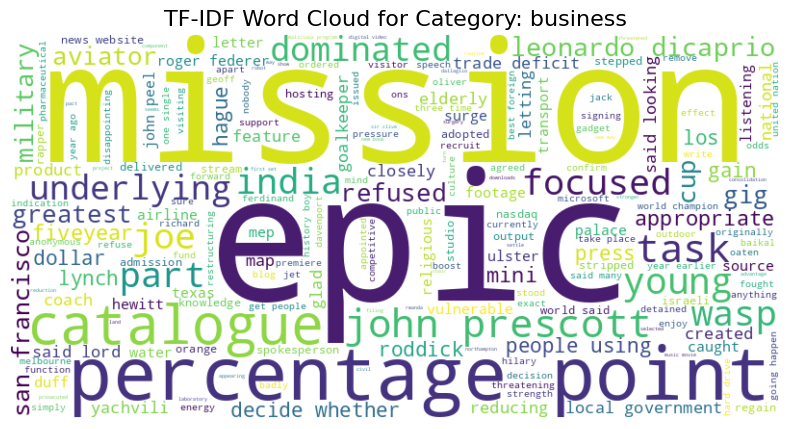

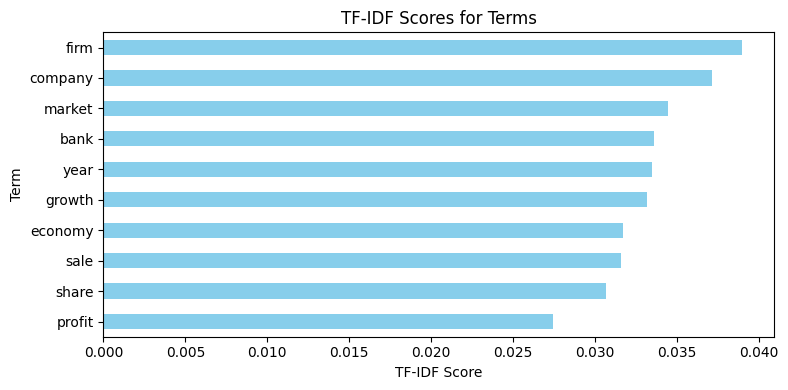


📰 TECH:
  mobile: 0.0513
  phone: 0.0468
  people: 0.0457
  technology: 0.0410
  game: 0.0381
  user: 0.0377
  service: 0.0369
  software: 0.0365
  computer: 0.0329
  net: 0.0308


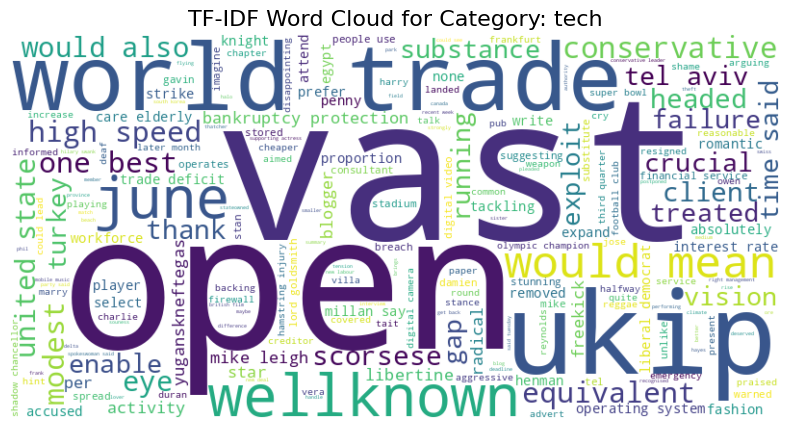

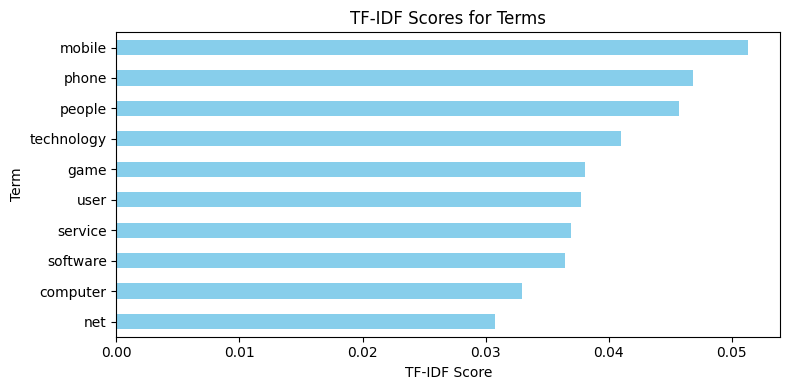


📰 POLITICS:
  labour: 0.0648
  election: 0.0604
  blair: 0.0558
  party: 0.0538
  tory: 0.0463
  would: 0.0456
  government: 0.0455
  minister: 0.0427
  brown: 0.0384
  tax: 0.0330


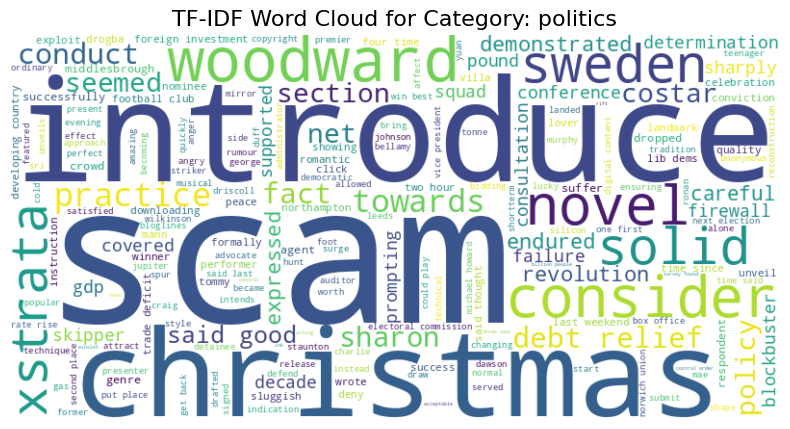

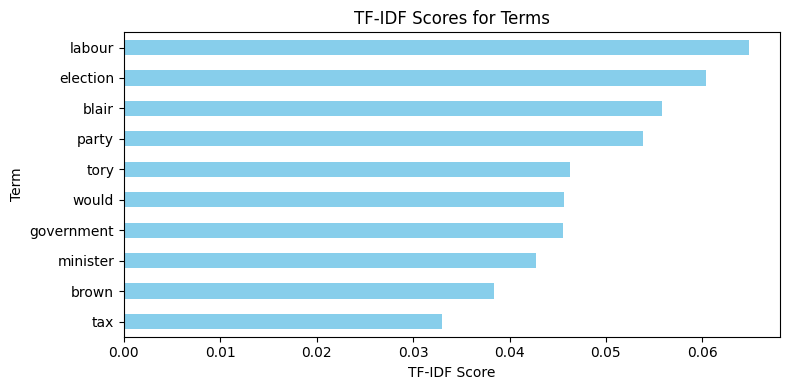


📰 SPORT:
  game: 0.0448
  england: 0.0375
  win: 0.0342
  player: 0.0323
  match: 0.0304
  champion: 0.0293
  cup: 0.0278
  team: 0.0260
  chelsea: 0.0255
  injury: 0.0249


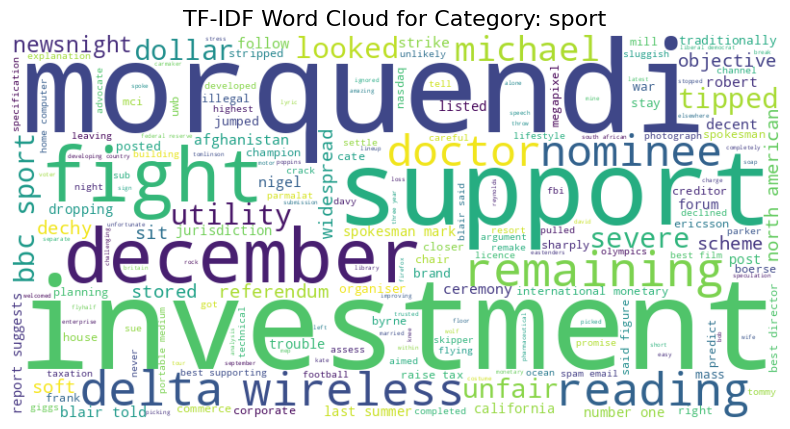

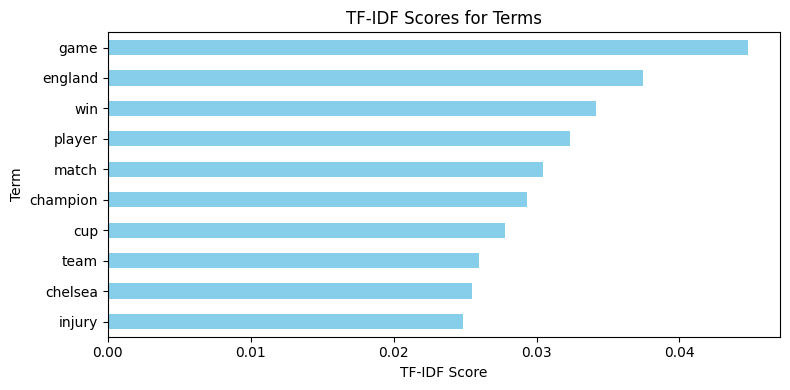


📰 ENTERTAINMENT:
  film: 0.1000
  award: 0.0524
  best: 0.0460
  show: 0.0376
  star: 0.0375
  music: 0.0357
  band: 0.0350
  actor: 0.0339
  year: 0.0300
  album: 0.0291


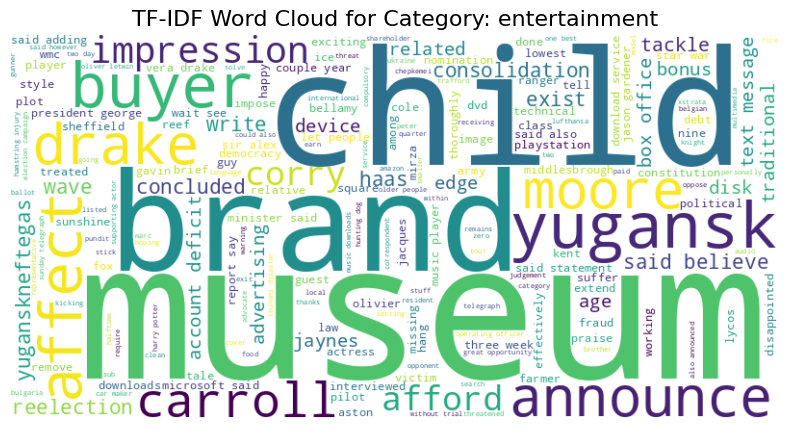

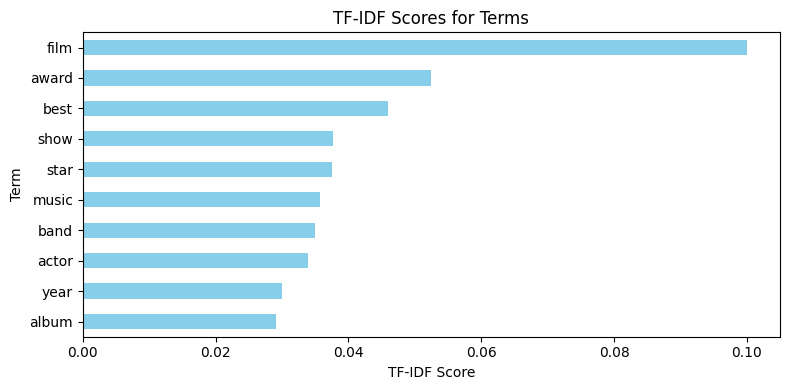

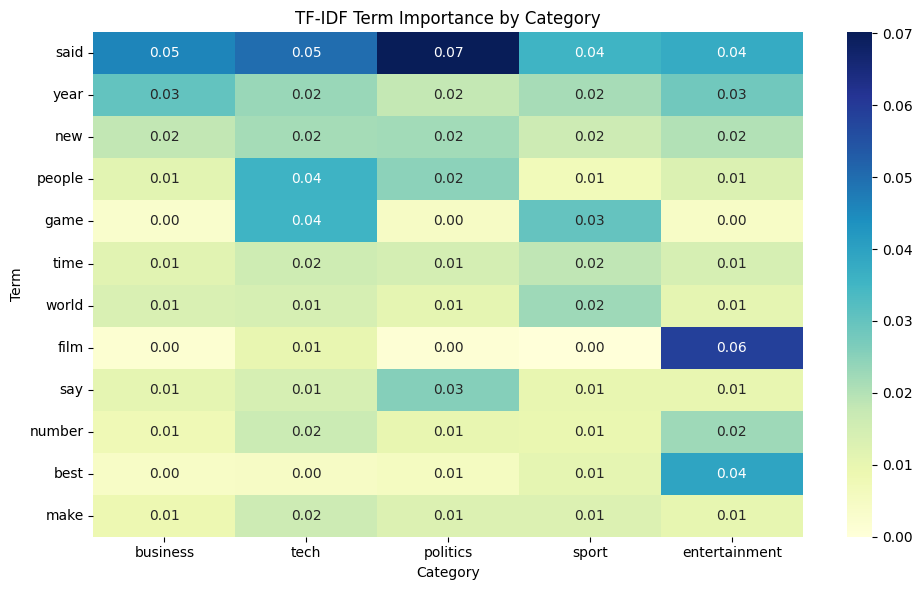

In [ ]:
# Analyze most important terms per category
def get_top_tfidf_terms(category, n_terms=10):
    """
    Get top TF-IDF terms for a specific category

    💡 TIP: This function should:
    - Filter data for the specific category
    - Calculate mean TF-IDF scores for each term
    - Return top N terms with highest scores
    """
    # 🚀 YOUR CODE HERE: Implement category-specific TF-IDF analysis
    category_data = tfidf_df[tfidf_df['Category'] == category]

    # Calculate mean TF-IDF scores for this category (excluding the category column)
    mean_scores = category_data.drop('Category', axis=1).mean().sort_values(ascending=False)

    return mean_scores.head(n_terms)

# Analyze top terms for each category
print("🏷️ TOP TF-IDF TERMS BY CATEGORY")
print("=" * 50)

categories = df['Category'].unique()
category_terms = {}
category_term_matrix = {}

for category in categories:
    top_terms = get_top_tfidf_terms(category, n_terms=10)
    category_terms[category] = top_terms

    print(f"\n📰 {category.upper()}:")
    for term, score in top_terms.items():
        print(f"  {term}: {score:.4f}")

    #### - Word clouds for each category
    category_data = df[df['Category'] == category]['text_processed']

    # Fit TF-IDF on category data
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_mat = tfidf.fit_transform(category_data)

    # # Map words to their average TF-IDF score
    scores = tfidf_mat.toarray().mean(axis=0)
    word_scores = dict(zip(feature_names, scores))

    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(word_scores)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'TF-IDF Word Cloud for Category: {category}', fontsize=16)
    plt.show()

    #### - Bar charts of top terms
    series = pd.Series(top_terms).sort_values(ascending=True)

    plt.figure(figsize=(8, 4))
    series.plot(kind='barh', color='skyblue')
    plt.title("TF-IDF Scores for Terms")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Term")
    plt.tight_layout()
    plt.show()

    terms = tfidf.get_feature_names_out()

    # Store in dict
    category_term_matrix[category] = pd.Series(scores, index=terms)

#### - Heatmap of term importance across categories
# Combine into a DataFrame
heatmap_df = pd.DataFrame(category_term_matrix).fillna(0)

top_terms = heatmap_df.sum(axis=1).sort_values(ascending=False).head(12).index
top_terms_df = heatmap_df.loc[top_terms]

# Plot Heatmap
print()
plt.figure(figsize=(10, 6))
sns.heatmap(top_terms_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("TF-IDF Term Importance by Category")
plt.xlabel("Category")
plt.ylabel("Term")
plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Create visualizations for TF-IDF analysis
# - Word clouds for each category
    # This has been completed in the above code
# - Bar charts of top terms
    # This has been completed in the above code
# - Heatmap of term importance across categories
    # This has been completed in the above code

## 🏷️ Part-of-Speech Analysis

### 🎯 Module 4: Grammatical Pattern Analysis

Let's analyze the grammatical patterns in different news categories using Part-of-Speech (POS) tagging. This can reveal interesting differences in writing styles between categories.

**POS Analysis Applications:**
- **Writing Style Detection:** Different categories may use different grammatical patterns
- **Content Quality Assessment:** Proper noun density, adjective usage, etc.
- **Feature Engineering:** POS tags can be features for classification

**💡 Hypothesis:** Sports articles might have more action verbs, while business articles might have more numbers and proper nouns.

In [ ]:
def analyze_pos_patterns(text):
    """
    Analyze POS patterns in text

    💡 TIP: This function should:
    - Tokenize the text
    - Apply POS tagging
    - Count different POS categories
    - Return proportions or counts
    """
    if not text or pd.isna(text):
        return {}

    # 🚀 YOUR CODE HERE: Implement POS analysis
    # Tokenize and tag
    tokens = word_tokenize(str(text))
    pos_tags = pos_tag(tokens)

    # Count POS categories
    pos_counts = Counter([tag for word, tag in pos_tags])
    total_words = len(pos_tags)

    if total_words == 0:
        return {}

    # Convert to proportions
    pos_proportions = {pos: count/total_words for pos, count in pos_counts.items()}

    return pos_proportions

# Apply POS analysis to all articles
print("🏷️ Analyzing POS patterns...")

# Analyze POS for each article
pos_results = []
for idx, row in df.iterrows():
    pos_analysis = analyze_pos_patterns(row['text_processed'])
    pos_analysis['Category'] = row['Category']
    pos_analysis['ArticleId'] = row['ArticleId']
    pos_results.append(pos_analysis)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_results).fillna(0)

print(f"✅ POS analysis complete!")
print(f"📊 Found {len(pos_df.columns)-2} different POS tags")

# Show sample results
print("\n📝 Sample POS analysis:")
print(pos_df.head())

🏷️ Analyzing POS patterns...
✅ POS analysis complete!
📊 Found 32 different POS tags

📝 Sample POS analysis:
         NN       VBG        JJ       NNS       VBP       VBN        RB  \
0  0.502924  0.058480  0.140351  0.058480  0.023392  0.046784  0.029240   
1  0.450777  0.062176  0.217617  0.005181  0.015544  0.020725  0.056995   
2  0.424812  0.056391  0.184211  0.030075  0.041353  0.045113  0.063910   
3  0.440476  0.044643  0.196429  0.032738  0.023810  0.029762  0.056548   
4  0.515306  0.071429  0.168367  0.010204  0.005102  0.035714  0.056122   

        VBD        VB       JJR  ...  RBS  WP$  WRB  POS  WDT  PRP  NNPS  \
0  0.093567  0.011696  0.011696  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1  0.093264  0.015544  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2  0.063910  0.011278  0.018797  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3  0.068452  0.023810  0.014881  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4  0.076531  0.010204  0.000000  ...  0.0  0.0  0.0  0.0  0.0

📊 POS PATTERNS BY CATEGORY

🎯 Key POS patterns by category:
                   NN     NNS     NNP  NNPS      VB     VBD     VBG     VBN  \
Category                                                                      
business       0.5051  0.0144  0.0026   0.0  0.0212  0.0803  0.0414  0.0261   
entertainment  0.4945  0.0197  0.0017   0.0  0.0143  0.0773  0.0411  0.0297   
politics       0.4734  0.0188  0.0013   0.0  0.0284  0.0792  0.0418  0.0304   
sport          0.4630  0.0222  0.0019   0.0  0.0207  0.0785  0.0380  0.0259   
tech           0.4773  0.0257  0.0018   0.0  0.0231  0.0622  0.0484  0.0285   

                  VBP     VBZ      JJ     JJR     JJS      RB     RBR     RBS  \
Category                                                                        
business       0.0209  0.0064  0.1811  0.0051  0.0065  0.0431  0.0028  0.0001   
entertainment  0.0236  0.0061  0.1878  0.0028  0.0086  0.0458  0.0020  0.0010   
politics       0.0288  0.0057  0.1922  0.0034  0.0030  0.0447 

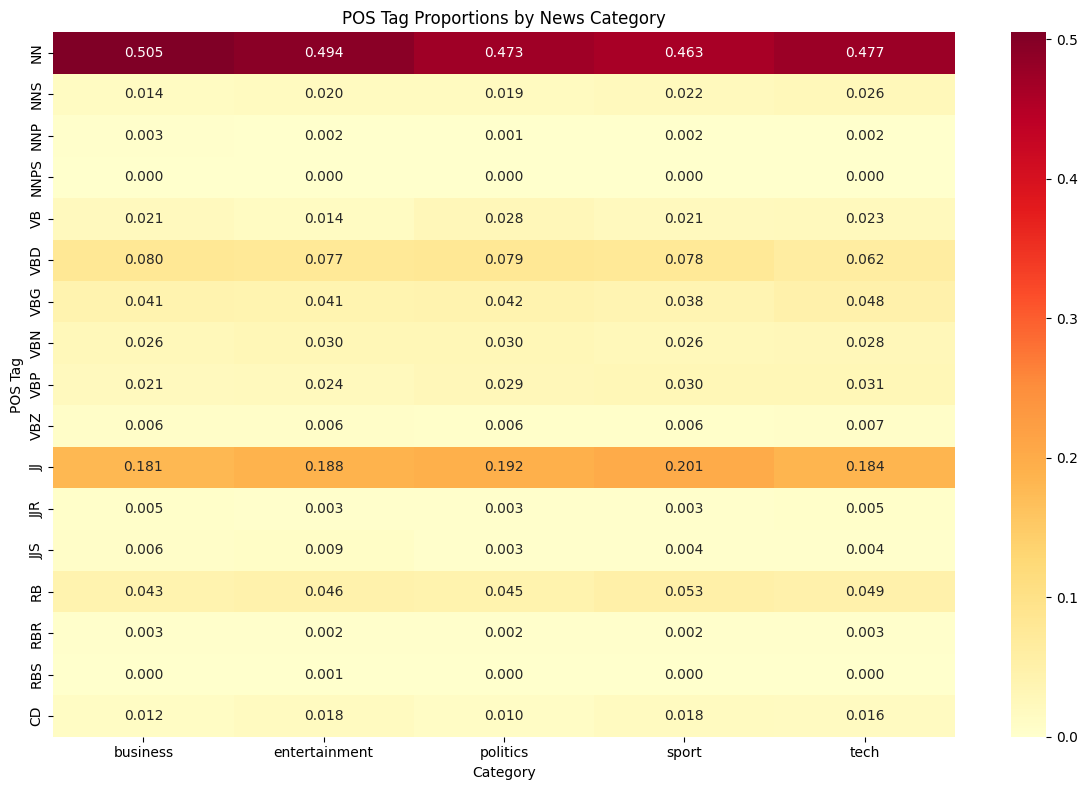


💡 ANALYSIS QUESTIONS:
1. Which category has the highest proportion of proper nouns (NNP/NNPS)?

    Based on the "Key POS patterns by category" table, the business category has the highest proportion of proper nouns (NNP), 
    with a value of 0.0026. This suggests that business articles tend to mention specific people, organizations, and places more 
    frequently than other categories.
    
2. Which category uses the most action verbs (VB, VBD, VBG)?

    The politics category has the highest combined proportion of these action verbs, suggesting a more descriptive and action-oriented language.

    business: 0.0212 + 0.0803 + 0.0414 = 0.1429
    entertainment: 0.0143 + 0.0773 + 0.0411 = 0.1327
    politics: 0.0284 + 0.0792 + 0.0418 = 0.1494
    sport: 0.0207 + 0.0785 + 0.0380 = 0.1372
    tech: 0.0231 + 0.0622 + 0.0484 = 0.1337
    
3. Are there interesting patterns in adjective (JJ) usage?

    Yes, there are. The sport category has the highest proportion of adjectives (JJ) at 0.2

In [ ]:
# Analyze POS patterns by category
print("📊 POS PATTERNS BY CATEGORY")
print("=" * 50)

# Group by category and calculate mean proportions
pos_by_category = pos_df.groupby('Category').mean()

# Focus on major POS categories
major_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
             'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'CD']

# Filter to only include major POS tags that exist in our data
available_pos = [pos for pos in major_pos if pos in pos_by_category.columns]

if available_pos:
    pos_summary = pos_by_category[available_pos]

    print("\n🎯 Key POS patterns by category:")
    print(pos_summary.round(4))

    # Create visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(pos_summary.T, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('POS Tag Proportions by News Category')
    plt.xlabel('Category')
    plt.ylabel('POS Tag')
    plt.tight_layout()
    plt.show()

    # 💡 STUDENT TASK: Analyze the patterns
    # - Which categories use more nouns vs verbs?
    """
    The business category uses the most nouns and the politics category has the highest avg use across all action verb categories.
    """
    # - Do business articles have more numbers (CD)?
    """
    No, entertainment and sport articles have a higher proportion of numbers than business articles.
    """
    # - Are there differences in adjective usage?
    """
    Yes, sport and politics articles use adjectives (JJ) more frequently than other categories, indicating more descriptive language.
    """

    print("\n💡 ANALYSIS QUESTIONS:")
    print("1. Which category has the highest proportion of proper nouns (NNP/NNPS)?")
    print("""
    Based on the "Key POS patterns by category" table, the business category has the highest proportion of proper nouns (NNP),
    with a value of 0.0026. This suggests that business articles tend to mention specific people, organizations, and places more
    frequently than other categories.
    """)
    print("2. Which category uses the most action verbs (VB, VBD, VBG)?")
    print("""
    The politics category has the highest combined proportion of these action verbs, suggesting a more descriptive and action-oriented language.

    business: 0.0212 + 0.0803 + 0.0414 = 0.1429
    entertainment: 0.0143 + 0.0773 + 0.0411 = 0.1327
    politics: 0.0284 + 0.0792 + 0.0418 = 0.1494
    sport: 0.0207 + 0.0785 + 0.0380 = 0.1372
    tech: 0.0231 + 0.0622 + 0.0484 = 0.1337
    """)
    print("3. Are there interesting patterns in adjective (JJ) usage?")
    print("""
    Yes, there are. The sport category has the highest proportion of adjectives (JJ) at 0.2015, closely followed by politics at 0.1922.
    This indicates that sports and politics articles tend to use more descriptive language compared to the other categories.
    """)
    print("4. How does number (CD) usage vary across categories?")
    print("""
    - The entertainment category has the highest proportion of numbers at 0.0184, followed by sport at 0.0180. This might be due to mentions of dates, awards, scores, or other numerical data in these articles.
    - The politics category has the lowest proportion of numbers at 0.0102.
    """)
else:
    print("⚠️ No major POS tags found in the analysis. Check your POS tagging implementation.")

## 🌳 Syntax Parsing and Semantic Analysis

### 🎯 Module 5: Understanding Sentence Structure

Now we'll use spaCy to perform dependency parsing and extract semantic relationships from our news articles. This helps us understand not just what words are present, but how they relate to each other.

**Dependency Parsing Applications:**
- **Relationship Extraction:** Find connections between entities
- **Event Detection:** Identify who did what to whom
- **Information Extraction:** Extract structured facts from unstructured text

**💡 Business Value:** Understanding sentence structure helps extract more precise information about events, relationships, and actions mentioned in news articles.

In [ ]:
def extract_syntactic_features(text):
    """
    Extract syntactic features using spaCy dependency parsing

    💡 TIP: This function should extract:
    - Dependency relations
    - Subject-verb-object patterns
    - Noun phrases
    - Verb phrases
    """
    if not text or pd.isna(text):
        return {}

    # Process text with spaCy
    doc = nlp(str(text))

    features = {
        'num_sentences': len(list(doc.sents)),
        'num_tokens': len(doc),
        'dependency_relations': [],
        'noun_phrases': [],
        'verb_phrases': [],
        'subjects': [],
        'objects': []
    }

    # 🚀 YOUR CODE HERE: Extract syntactic features

    # Extract dependency relations
    for token in doc:
        if not token.is_space and not token.is_punct:
            features['dependency_relations'].append(token.dep_)

    # Extract noun phrases
    for chunk in doc.noun_chunks:
        features['noun_phrases'].append(chunk.text.lower())

    # Extract subjects and objects
    for token in doc:
        if token.dep_ in ['nsubj', 'nsubjpass']:  # Subjects
            features['subjects'].append(token.text.lower())
        elif token.dep_ in ['dobj', 'iobj', 'pobj']:  # Objects
            features['objects'].append(token.text.lower())

    # Count dependency types
    dep_counts = Counter(features['dependency_relations'])
    features['dependency_counts'] = dict(dep_counts)

    return features

# Apply syntactic analysis to sample articles
print("🌳 Performing syntactic analysis...")

# Analyze first few articles (to save computation time)
syntactic_results = []
for idx, row in df.head(5).iterrows():  # Limit to first 5 for demo
    features = extract_syntactic_features(row['text_processed'])
    features['Category'] = row['Category']
    features['ArticleId'] = row['ArticleId']
    syntactic_results.append(features)

print("✅ Syntactic analysis complete!")

# Display results
for i, result in enumerate(syntactic_results):
    print(f"\n📰 Article {i+1} ({result['Category']}):")
    print(f"  Sentences: {result['num_sentences']}")
    print(f"  Tokens: {result['num_tokens']}")
    print(f"  Noun phrases: {result['noun_phrases'][:3]}...")  # Show first 3
    print(f"  Subjects: {result['subjects'][:3]}...")  # Show first 3
    print(f"  Objects: {result['objects'][:3]}...")  # Show first 3

🌳 Performing syntactic analysis...
✅ Syntactic analysis complete!

📰 Article 1 (business):
  Sentences: 1
  Tokens: 171
  Noun phrases: ['worldcom exboss launch defence lawyer', 'former worldcom chief bernie ebbers battery fraud charge', 'company']...
  Subjects: ['lawyer', 'worldcom', 'warning']...
  Objects: ['charge', 'firm', 'ebbers']...

📰 Article 2 (business):
  Sentences: 2
  Tokens: 193
  Noun phrases: ['german business confidence slide german business confidence', 'hope speedy recovery europe', 'largest economy']...
  Subjects: ['confidence', 'economy', 'institute']...
  Objects: ['europe', 'activity', 'index']...

📰 Article 3 (business):
  Sentences: 1
  Tokens: 266
  Noun phrases: ['bbc poll', 'economic gloom citizen majority nation', 'bbc world service poll']...
  Subjects: ['poll', 'nation', 'poll']...
  Objects: ['respondent', 'poll', 'country']...

📰 Article 4 (tech):
  Sentences: 1
  Tokens: 336
  Noun phrases: ['lifestyle governs', 'mobile choice faster better funkier 

In [ ]:
# Visualize dependency parsing for a sample sentence
from spacy import displacy

# Choose a sample sentence
sample_sentence = df.iloc[0]['text_processed']  # First article's content
print(f"📝 Sample sentence: {sample_sentence}")

# Process with spaCy
doc = nlp(sample_sentence)

# Display dependency tree (this works best in Jupyter)
print("\n🌳 Dependency Parse Visualization:")
try:
    # This will create an interactive visualization in Jupyter
    displacy.render(doc, style="dep", jupyter=True)
except:
    # Fallback: print dependency information
    print("\n🔗 Dependency Relations:")
    for token in doc:
        if not token.is_space and not token.is_punct:
            print(f"  {token.text} --> {token.dep_} --> {token.head.text}")

# 💡 STUDENT TASK: Extend syntactic analysis
# - Compare syntactic complexity across categories
categories = df['Category'].unique()

for category in categories:
    category_data = df[df['Category'] == category]['text_processed']

    # Analyze syntactic complexity
    syntactic_results = []
    for text in category_data:
        features = extract_syntactic_features(text)
        features['Category'] = category
        syntactic_results.append(features)

    print(f"\n📊 Analyzing syntactic complexity for {category.upper()}")
    print(f"  Total sentences: {len(syntactic_results)}")
    print(f"  Total tokens: {sum(result['num_tokens'] for result in syntactic_results)}")
    print(f"  Average tokens per sentence: {sum(result['num_tokens'] for result in syntactic_results) / len(syntactic_results):.2f}")
    print(f"  Average dependency relations per sentence: {sum(len(result['dependency_relations']) for result in syntactic_results) / len(syntactic_results):.2f}")
    print(f"  Average noun phrases per sentence: {sum(len(result['noun_phrases']) for result in syntactic_results) / len(syntactic_results):.2f}")
    print(f"  Average subjects per sentence: {sum(len(result['subjects']) for result in syntactic_results) / len(syntactic_results):.2f}")
    print(f"  Average objects per sentence: {sum(len(result['objects']) for result in syntactic_results) / len(syntactic_results):.2f}")
    print(f"  Most common noun phrases: {Counter(phrase for result in syntactic_results for phrase in result['noun_phrases']).most_common(5)}")
    print(f"  Most common subjects: {Counter(subject for result in syntactic_results for subject in result['subjects']).most_common(5)}")
    print(f"  Most common objects: {Counter(obj for result in syntactic_results for obj in result['objects']).most_common(5)}")

# - Extract action patterns (who did what)
def extract_action_patterns(text):
    doc = nlp(text)
    action_patterns = []

    for sent in doc.sents:
        subject = ""
        verb = ""
        obj = ""

        for token in sent:
            # Find a verb
            if token.pos_ == "VERB":
                verb = token

                # Find subject connected to the verb
                subj = [w for w in token.lefts if w.dep_ in ["subj","nsubj", "nsubjpass"]]
                if subj:
                    subject = subj[0].text

                    # Find object connected to the verb
                    obj_candidates = [w for w in token.rights if w.dep_ in ("obj","dobj","pobj")]
                    if obj_candidates:
                        obj = obj_candidates[0].text
                        action_patterns.append((subject, verb, obj))

    return action_patterns, doc

for category in categories:
    reduce_sample_df = df.groupby('Category', group_keys=False).apply(lambda x: x.sample(n=5, random_state=42))
    category_data = reduce_sample_df[reduce_sample_df['Category'] == category]['text_processed']

    print(f"\n📰 Text from {category.upper()}:\n")
    for text in category_data:
        action_patterns, tags = extract_action_patterns(text)
        if action_patterns:
            for pattern in action_patterns:
                print(f"Subject: {pattern[0]} Verb: {pattern[1]} Object: {pattern[2]}")
                print(f"Tags: {[(token.text, token.pos_) for token in tags]}\n")

# - Identify most common dependency relations per category
for category in categories:
    category_data = df[df['Category'] == category]['text_processed']

    # Analyze syntactic complexity
    syntactic_results = []
    for text in category_data:
        features = extract_syntactic_features(text)
        features['Category'] = category
        syntactic_results.append(features)

    print(f"\n📊 Analyzing syntactic complexity for {category.upper()}")
    print(f"Most common dependency relations: {Counter(token for result in syntactic_results for token in result['dependency_relations']).most_common(5)}\n")

# - Create features for classification based on syntax
new_features = []

print("📊 Creating new features based on syntax:\n")
for category in categories:
    category_data = df[df['Category'] == category]['text_processed']


    for text in category_data:
      words = []
      num_nouns = []
      num_verbs = []

      for token in text.split(" "):
        if token.isalpha:
          words.append(token)
      text = nlp(text)
      pos_counts = text.count_by(spacy.attrs.POS)
      num_nouns.append(pos_counts.get(nlp.vocab.strings['NOUN'], 0))
      num_verbs.append(pos_counts.get(nlp.vocab.strings['VERB'], 0))

      total_words = len(words)

      new_features.append({
          'avg_sentence_length': total_words / max(len(category_data), 1),
          'avg_word_length': sum(len(token) for token in words) / max(total_words, 1),
          'num_nouns': sum(num_nouns),
          'num_verbs': sum(num_verbs),
          'category': category
      })
new_features_df = pd.DataFrame(new_features)
print(new_features_df)

📝 Sample sentence: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom exhead internal accounting alerted director irregular accounting practice telecom giant warning led collapse firm following discovery accounting fraud ebbers pleaded guilty charge fraud conspiracy prosecution lawyer argued ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early said andersen given green light procedure practice used worldcom ebber lawyer said unaware fraud arguing auditor alert problem cooper also said shareholder meeting ebbers often passed technical question company finance chief giving brief answer prosecution star witness former worldcom financial chief scott sullivan said e


📊 Analyzing syntactic complexity for BUSINESS
  Total sentences: 336
  Total tokens: 61902
  Average tokens per sentence: 184.23
  Average dependency relations per sentence: 184.23
  Average noun phrases per sentence: 33.30
  Average subjects per sentence: 19.18
  Average objects per sentence: 15.21
  Most common noun phrases: [('company', 26), ('china', 25), ('economy', 24), ('people', 23), ('money', 21)]
  Most common subjects: [('company', 170), ('firm', 96), ('economy', 94), ('government', 75), ('analyst', 74)]
  Most common objects: [('company', 79), ('growth', 64), ('economy', 57), ('market', 53), ('country', 50)]

📊 Analyzing syntactic complexity for TECH
  Total sentences: 261
  Total tokens: 70474
  Average tokens per sentence: 270.02
  Average dependency relations per sentence: 270.02
  Average noun phrases per sentence: 50.42
  Average subjects per sentence: 26.85
  Average objects per sentence: 25.20
  Most common noun phrases: [('people', 296), ('microsoft', 50), ('someth

## 😊 Sentiment and Emotion Analysis

### 🎯 Module 6: Understanding Emotional Tone

Let's analyze the sentiment and emotional tone of our news articles. This can reveal interesting patterns about how different types of news are presented and perceived.

**Sentiment Analysis Applications:**
- **Media Bias Detection:** Identify emotional slant in news coverage
- **Public Opinion Tracking:** Monitor sentiment trends over time
- **Content Recommendation:** Suggest articles based on emotional tone

**💡 Hypothesis:** Different news categories might have different emotional profiles - sports might be more positive, politics more negative, etc.

In [ ]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze sentiment using VADER sentiment analyzer

    💡 TIP: VADER returns:
    - compound: overall sentiment (-1 to 1)
    - pos: positive score (0 to 1)
    - neu: neutral score (0 to 1)
    - neg: negative score (0 to 1)
    """
    if not text or pd.isna(text):
        return {'compound': 0, 'pos': 0, 'neu': 1, 'neg': 0}

    # 🚀 YOUR CODE HERE: Implement sentiment analysis
    scores = sia.polarity_scores(str(text))

    # Add interpretation
    if scores['compound'] >= 0.05:
        scores['sentiment_label'] = 'positive'
    elif scores['compound'] <= -0.05:
        scores['sentiment_label'] = 'negative'
    else:
        scores['sentiment_label'] = 'neutral'

    return scores

# Apply sentiment analysis to all articles
print("😊 Analyzing sentiment...")

sentiment_results = []
for idx, row in df.iterrows():
    # Analyze text sentiment
    full_sentiment = analyze_sentiment(row['text_processed'])

    result = {
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'full_sentiment': full_sentiment['compound'],
        'full_label': full_sentiment['sentiment_label'],
        'pos_score': full_sentiment['pos'],
        'neu_score': full_sentiment['neu'],
        'neg_score': full_sentiment['neg']
    }
    sentiment_results.append(result)

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

print("✅ Sentiment analysis complete!")
print(f"📊 Analyzed {len(sentiment_df)} articles")

# Display sample results
print("\n📝 Sample sentiment results:")
print(sentiment_df[['category', 'full_sentiment', 'full_label']].head())

😊 Analyzing sentiment...
✅ Sentiment analysis complete!
📊 Analyzed 1490 articles

📝 Sample sentiment results:
   category  full_sentiment full_label
0  business         -0.9870   negative
1  business          0.9331   positive
2  business         -0.9519   negative
3      tech          0.9892   positive
4  business         -0.9601   negative


📊 SENTIMENT ANALYSIS BY CATEGORY

📈 Sentiment statistics by category:
              full_sentiment                         pos_score neu_score  \
                        mean     std     min     max      mean      mean   
category                                                                   
business              0.2716  0.8198 -0.9970  0.9993    0.1484    0.7426   
entertainment         0.6037  0.6794 -0.9962  0.9997    0.2034    0.7152   
politics              0.1223  0.8672 -0.9981  0.9998    0.1523    0.7184   
sport                 0.5508  0.7112 -0.9950  0.9990    0.2067    0.6868   
tech                  0.5399  0.7541 -0.9977  0.9989    0.1458    0.7776   

              neg_score  
                   mean  
category                 
business         0.1091  
entertainment    0.0814  
politics         0.1293  
sport            0.1065  
tech             0.0765  

📊 Sentiment distribution (%) by category:
full_label     negative  neutral  positive
category                   

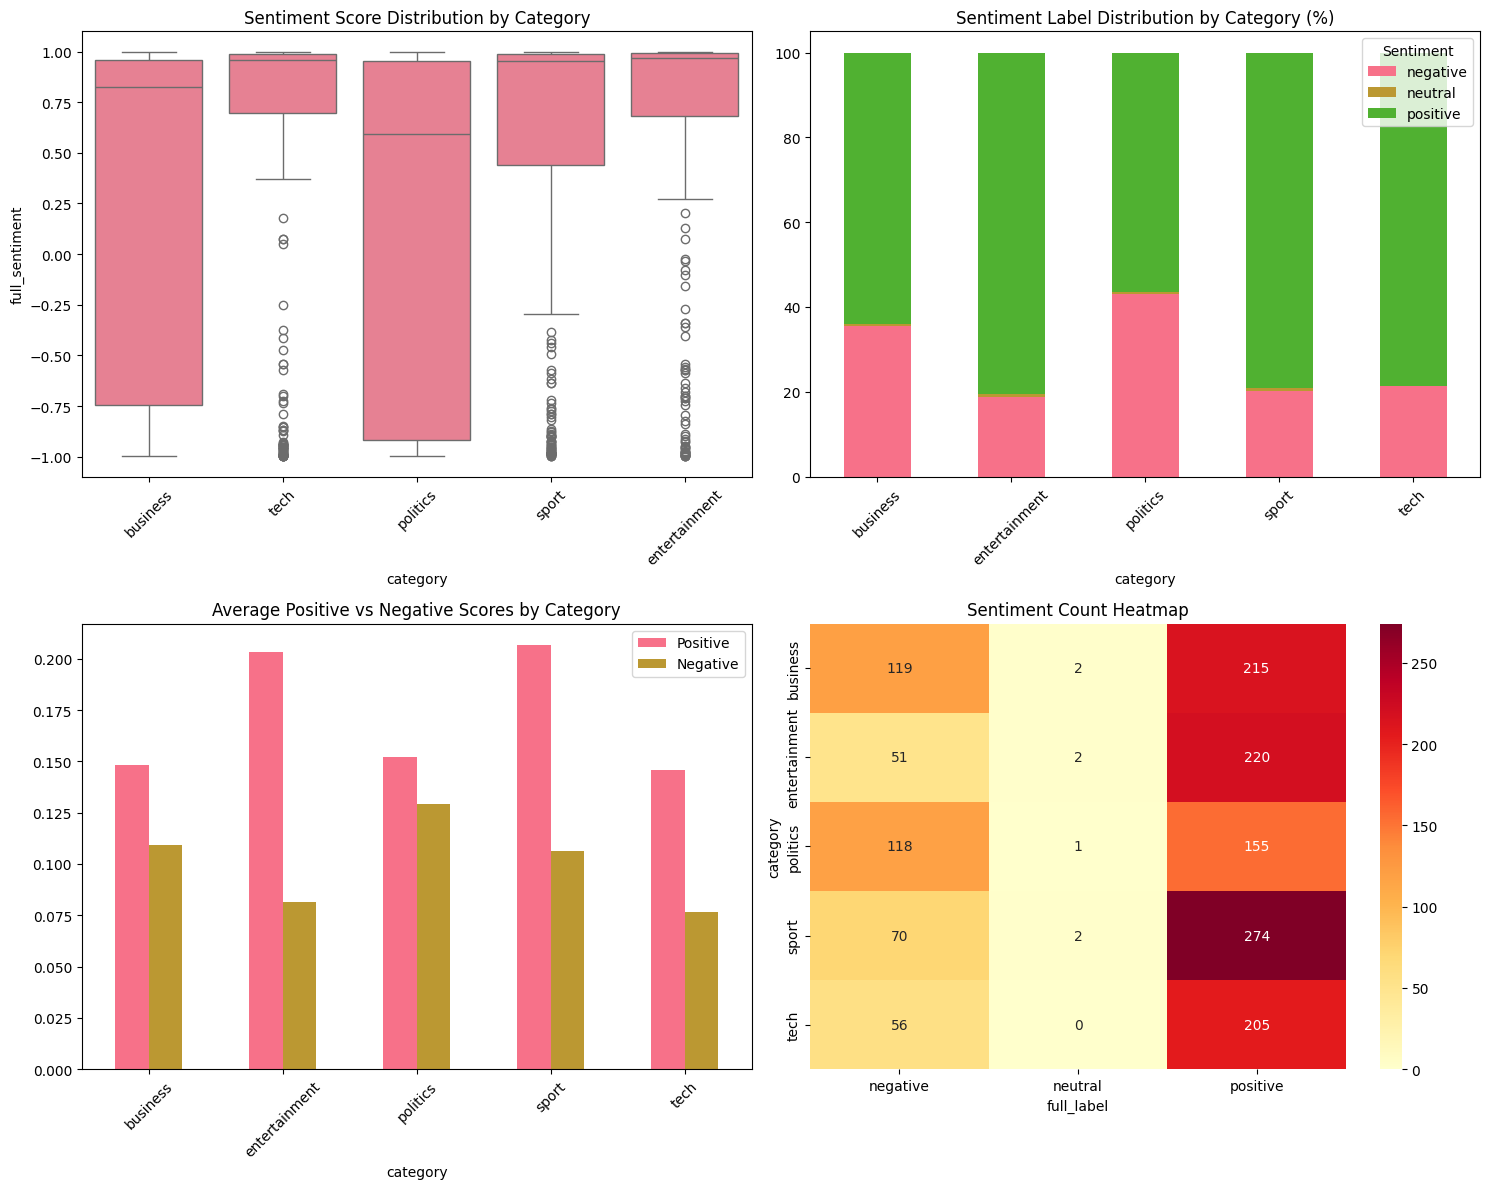

'\nYes, sentiment can be a useful feature for classification. The fact that different categories have distinct sentiment profiles suggests that sentiment \nscores could help a machine learning model differentiate between them. For example, a highly positive article is more likely to be about entertainment \nor sport than politics. The sentiment features were, in fact, included in the feature matrix for the classifier in the notebook.\n'

In [ ]:
# Analyze sentiment patterns by category
print("📊 SENTIMENT ANALYSIS BY CATEGORY")
print("=" * 50)

# Calculate sentiment statistics by category
sentiment_by_category = sentiment_df.groupby('category').agg({
    'full_sentiment': ['mean', 'std', 'min', 'max'],
    'pos_score': 'mean',
    'neu_score': 'mean',
    'neg_score': 'mean'
}).round(4)

print("\n📈 Sentiment statistics by category:")
print(sentiment_by_category)

# Sentiment distribution by category
sentiment_dist = sentiment_df.groupby(['category', 'full_label']).size().unstack(fill_value=0)
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100

print("\n📊 Sentiment distribution (%) by category:")
print(sentiment_dist_pct.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sentiment scores by category
sns.boxplot(data=sentiment_df, x='category', y='full_sentiment', ax=axes[0,0])
axes[0,0].set_title('Sentiment Score Distribution by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Sentiment label distribution
sentiment_dist_pct.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Sentiment Label Distribution by Category (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Sentiment')

# 3. Positive vs Negative scores
category_means = sentiment_df.groupby('category')[['pos_score', 'neg_score']].mean()
category_means.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Positive vs Negative Scores by Category')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['Positive', 'Negative'])

# 4. Sentiment vs Category heatmap
sentiment_pivot = sentiment_df.pivot_table(values='full_sentiment', index='category',
                                         columns='full_label', aggfunc='count', fill_value=0)
sns.heatmap(sentiment_pivot, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Sentiment Count Heatmap')

plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Analyze sentiment patterns
# - Which categories are most positive/negative?
"""
The entertainment category is the most positive having the highest average sentiment score (0.6037) and the highest percentage of positive articles (80.59%).
The politics category is the most negative having the lowest average sentiment score (0.1223) and the highest percentage of negative articles (43.07%).
"""
# - Are there differences between title and content sentiment?
# - How does sentiment vary within categories?
"""
The boxplot shows that even though some categories have a higher average sentiment, all categories have a wide range of sentiment scores, from very negative to
very positive. This indicates that even within a single category, there is a diversity of sentiment in the articles. For example, while the sport category
is generally positive, it still has a significant number of articles with negative sentiment.
"""
# - Can sentiment be used as a feature for classification?
"""
Yes, sentiment can be a useful feature for classification. The fact that different categories have distinct sentiment profiles suggests that sentiment
scores could help a machine learning model differentiate between them. For example, a highly positive article is more likely to be about entertainment
or sport than politics. The sentiment features were, in fact, included in the feature matrix for the classifier in the notebook.
"""

## 🏷️ Text Classification System

### 🎯 Module 7: Building the News Classifier

Now we'll build the core of our NewsBot system - a multi-class text classifier that can automatically categorize news articles. We'll compare different algorithms and evaluate their performance.

**Classification Pipeline:**
1. **Feature Engineering:** Combine TF-IDF with other features
2. **Model Training:** Train multiple algorithms
3. **Model Evaluation:** Compare performance metrics
4. **Model Selection:** Choose the best performing model

**💡 Business Impact:** Accurate classification enables automatic content routing, personalized recommendations, and efficient content management.

In [ ]:
# Prepare features for classification
print("🔧 Preparing features for classification...")

# 💡 TIP: Combine multiple feature types for better performance
# - TF-IDF features (most important)
# - Sentiment features
# - Text length features
# - POS features (if available)

# Create feature matrix
X_tfidf = tfidf_matrix.toarray()  # TF-IDF features

# Add sentiment features
sentiment_features = sentiment_df[['full_sentiment', 'pos_score', 'neu_score', 'neg_score']].values

# Add text length features
length_features = np.array([
    df['text_processed'].str.len(),  # Character length
    df['text_processed'].str.split().str.len(),  # Word count
    # df['title'].str.len(),  # Title length
]).T

# 🚀 YOUR CODE HERE: Combine all features
X_combined = pd.DataFrame(np.hstack([X_tfidf, sentiment_features, length_features]))
print(X_combined)

# Target variable
y = df['Category'].values
print(y)

print(f"✅ Feature matrix prepared!")
print(f"📊 Feature matrix shape: {X_combined.shape}")
print(f"🎯 Number of classes: {len(np.unique(y))}")
print(f"📋 Classes: {np.unique(y)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42,
)

print(f"\n📈 Data split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

🔧 Preparing features for classification...
      0     1     2         3     4     5     6     7     8     9     ...  \
0      0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0   0.0   0.0  0.022974   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...    ...   ...   ...       ...   ...   ...   ...   ...   ...   ...  ...   
1485   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1486   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1487   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1488   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1489   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  ...   

      4996  4997  4998  4999    

In [ ]:
# Train and evaluate multiple classifiers
print("🤖 Training multiple classifiers...")

# Define classifiers to compare
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(solver="newton-cg", C=10, random_state=42, max_iter=1000),
    'SVM': SVC(C=10, random_state=42, probability=True)  # Enable probability for better analysis
}

# 💡 TIP: For larger datasets, you might want to use SGDClassifier for efficiency
# from sklearn.linear_model import SGDClassifier
# classifiers['SGD'] = SGDClassifier(random_state=42)

# Train and evaluate each classifier
results = {}
trained_models = {}

for name, classifier in classifiers.items():
    print(f"\n🔄 Training {name}...")

    # 🚀 YOUR CODE HERE: Train and evaluate classifier
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test) if hasattr(classifier, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = classifier

    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n🏆 CLASSIFIER COMPARISON")
print("=" * 50)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n🥇 Best performing model: {best_model_name}")

🤖 Training multiple classifiers...

🔄 Training Naive Bayes...
  ✅ Accuracy: 0.9497
  📊 CV Score: 0.9421 (+/- 0.0143)

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.9765
  📊 CV Score: 0.9622 (+/- 0.0393)

🔄 Training SVM...
  ✅ Accuracy: 0.3221
  📊 CV Score: 0.3649 (+/- 0.0290)

🏆 CLASSIFIER COMPARISON
                 Model  Test Accuracy  CV Mean  CV Std
0          Naive Bayes         0.9497   0.9421  0.0072
1  Logistic Regression         0.9765   0.9622  0.0196
2                  SVM         0.3221   0.3649  0.0145

🥇 Best performing model: Logistic Regression


📊 DETAILED EVALUATION: Logistic Regression

📋 Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.99      0.97        75
entertainment       0.98      0.98      0.98        46
     politics       0.98      0.96      0.97        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.95      0.96        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



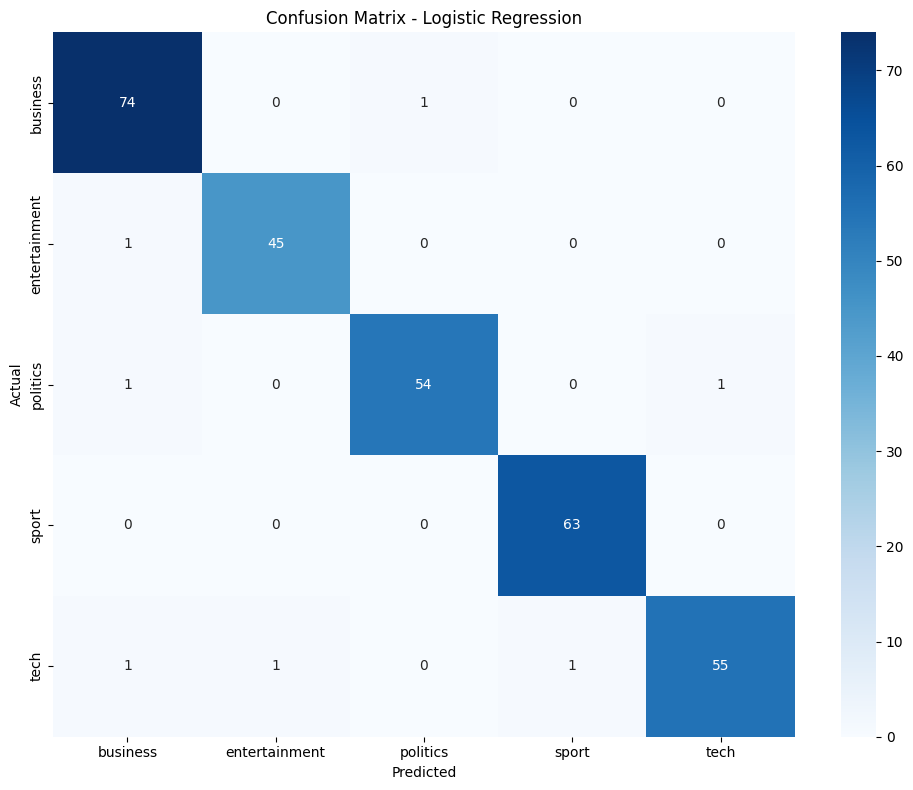


🔍 Top Features by Category:

📰 business:
  firm: 3.6105
  bank: 3.5311
  company: 3.0999
  share: 2.9394
  economic: 2.5790
  market: 2.5124
  profit: 2.3791
  economy: 2.2638
  investment: 2.0949
  growth: 2.0753

📰 entertainment:
  film: 5.0023
  show: 4.2939
  music: 3.9249
  star: 3.0845
  band: 2.8511
  singer: 2.7426
  actor: 2.6261
  album: 2.3485
  musician: 2.3319
  festival: 2.2175

📰 politics:
  blair: 3.3018
  party: 3.2629
  labour: 3.2395
  election: 3.1048
  minister: 2.9210
  government: 2.2233
  tory: 2.1452
  secretary: 2.1234
  lord: 2.1191
  brown: 2.0943

📰 sport:
  match: 2.6773
  england: 2.4364
  champion: 2.3750
  player: 2.3353
  coach: 2.2969
  chelsea: 2.2308
  cup: 2.0798
  conte: 1.9966
  jones: 1.9429
  rugby: 1.9344

📰 tech:
  game: 3.4567
  computer: 3.3809
  software: 2.9855
  mobile: 2.7885
  user: 2.6657
  email: 2.4274
  online: 2.4157
  net: 2.3816
  people: 2.2953
  phone: 2.2885


In [ ]:
# Detailed evaluation of the best model
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"📊 DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print("\n🔍 Top Features by Category:")
    feature_names_extended = list(feature_names) + ['sentiment', 'pos_score', 'neu_score', 'neg_score',
                                                   'char_length', 'word_count', 'title_length']

    classes = best_model.classes_
    coefficients = best_model.coef_

    for i, class_name in enumerate(classes):
        top_indices = np.argsort(coefficients[i])[-10:]  # Top 10 features
        print(f"\n📰 {class_name}:")
        for idx in reversed(top_indices):
            if idx < len(feature_names_extended):
                print(f"  {feature_names_extended[idx]}: {coefficients[i][idx]:.4f}")

## 🔍 Named Entity Recognition

### 🎯 Module 8: Extracting Facts from News

Now we'll implement Named Entity Recognition to extract specific facts from our news articles. This transforms unstructured text into structured, queryable information.

**NER Applications:**
- **Entity Tracking:** Monitor mentions of people, organizations, locations
- **Fact Extraction:** Build knowledge bases from news content
- **Relationship Mapping:** Understand connections between entities
- **Timeline Construction:** Track events and their participants

**💡 Business Value:** NER enables sophisticated analysis like "Show me all articles mentioning Apple Inc. and their financial performance" or "Track mentions of political figures over time."

In [ ]:
def extract_entities(text):
    """
    Extract named entities using spaCy

    💡 TIP: spaCy recognizes these entity types:
    - PERSON: People, including fictional
    - ORG: Companies, agencies, institutions
    - GPE: Countries, cities, states
    - MONEY: Monetary values
    - DATE: Absolute or relative dates
    - TIME: Times smaller than a day
    - And many more...
    """
    if not text or pd.isna(text):
        return []

    # 🚀 YOUR CODE HERE: Implement entity extraction
    doc = nlp(str(text))

    entities = []
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'start': ent.start_char,
            'end': ent.end_char,
            'description': spacy.explain(ent.label_)
        })

    return entities

# Apply NER to all articles
print("🔍 Extracting named entities...")

all_entities = []
article_entities = []

for idx, row in df.iterrows():
    entities = extract_entities(row['text_processed'])

    # Store entities for this article
    article_entities.append({
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'entities': entities,
        'entity_count': len(entities)
    })

    # Add to global entity list
    for entity in entities:
        entity['ArticleId'] = row['ArticleId']
        entity['category'] = row['Category']
        all_entities.append(entity)

print(f"✅ Entity extraction complete!")
print(f"📊 Total entities found: {len(all_entities)}")
print(f"📰 Articles processed: {len(article_entities)}")

# Convert to DataFrame for analysis
entities_df = pd.DataFrame(all_entities)

if not entities_df.empty:
    print(f"\n🏷️ Entity types found: {entities_df['label'].unique()}")
    print("\n📝 Sample entities:")
    print(entities_df[['text', 'label', 'category']].head(10))
else:
    print("⚠️ No entities found. This might happen with very short sample texts.")

🔍 Extracting named entities...
✅ Entity extraction complete!
📊 Total entities found: 27461
📰 Articles processed: 1490

🏷️ Entity types found: ['ORDINAL' 'PERSON' 'GPE' 'DATE' 'ORG' 'NORP' 'LOC' 'PRODUCT' 'CARDINAL'
 'MONEY' 'TIME' 'EVENT' 'QUANTITY' 'FAC' 'PERCENT' 'LANGUAGE'
 'WORK_OF_ART' 'LAW']

📝 Sample entities:
              text    label  category
0            first  ORDINAL  business
1   cynthia cooper   PERSON  business
2         new york      GPE  business
3        wednesday     DATE  business
4  arthur andersen   PERSON  business
5   scott sullivan   PERSON  business
6         sullivan   PERSON  business
7              mci      ORG  business
8        last week     DATE  business
9              mci      ORG  business


📊 NAMED ENTITY ANALYSIS

🏷️ Entity type distribution:
label
PERSON         6343
DATE           5239
GPE            3749
ORG            3558
CARDINAL       3150
NORP           2807
ORDINAL        1439
LOC             438
TIME            367
PRODUCT          98
QUANTITY         71
FAC              69
MONEY            68
LANGUAGE         28
EVENT            10
PERCENT           9
WORK_OF_ART       9
LAW               9
Name: count, dtype: int64

📰 Entity types by news category:
label          CARDINAL  DATE  EVENT  FAC   GPE  LANGUAGE  LAW  LOC  MONEY  \
category                                                                     
business            467  1497      0    8  1010         0    8  146     24   
entertainment       665   963      2   15   471         4    0   40     28   
politics            439   876      4   15   610         3    0  108      2   
sport               846  1122      3   29  1242        10    1   35      1   
tech                733   781      1    2   416     

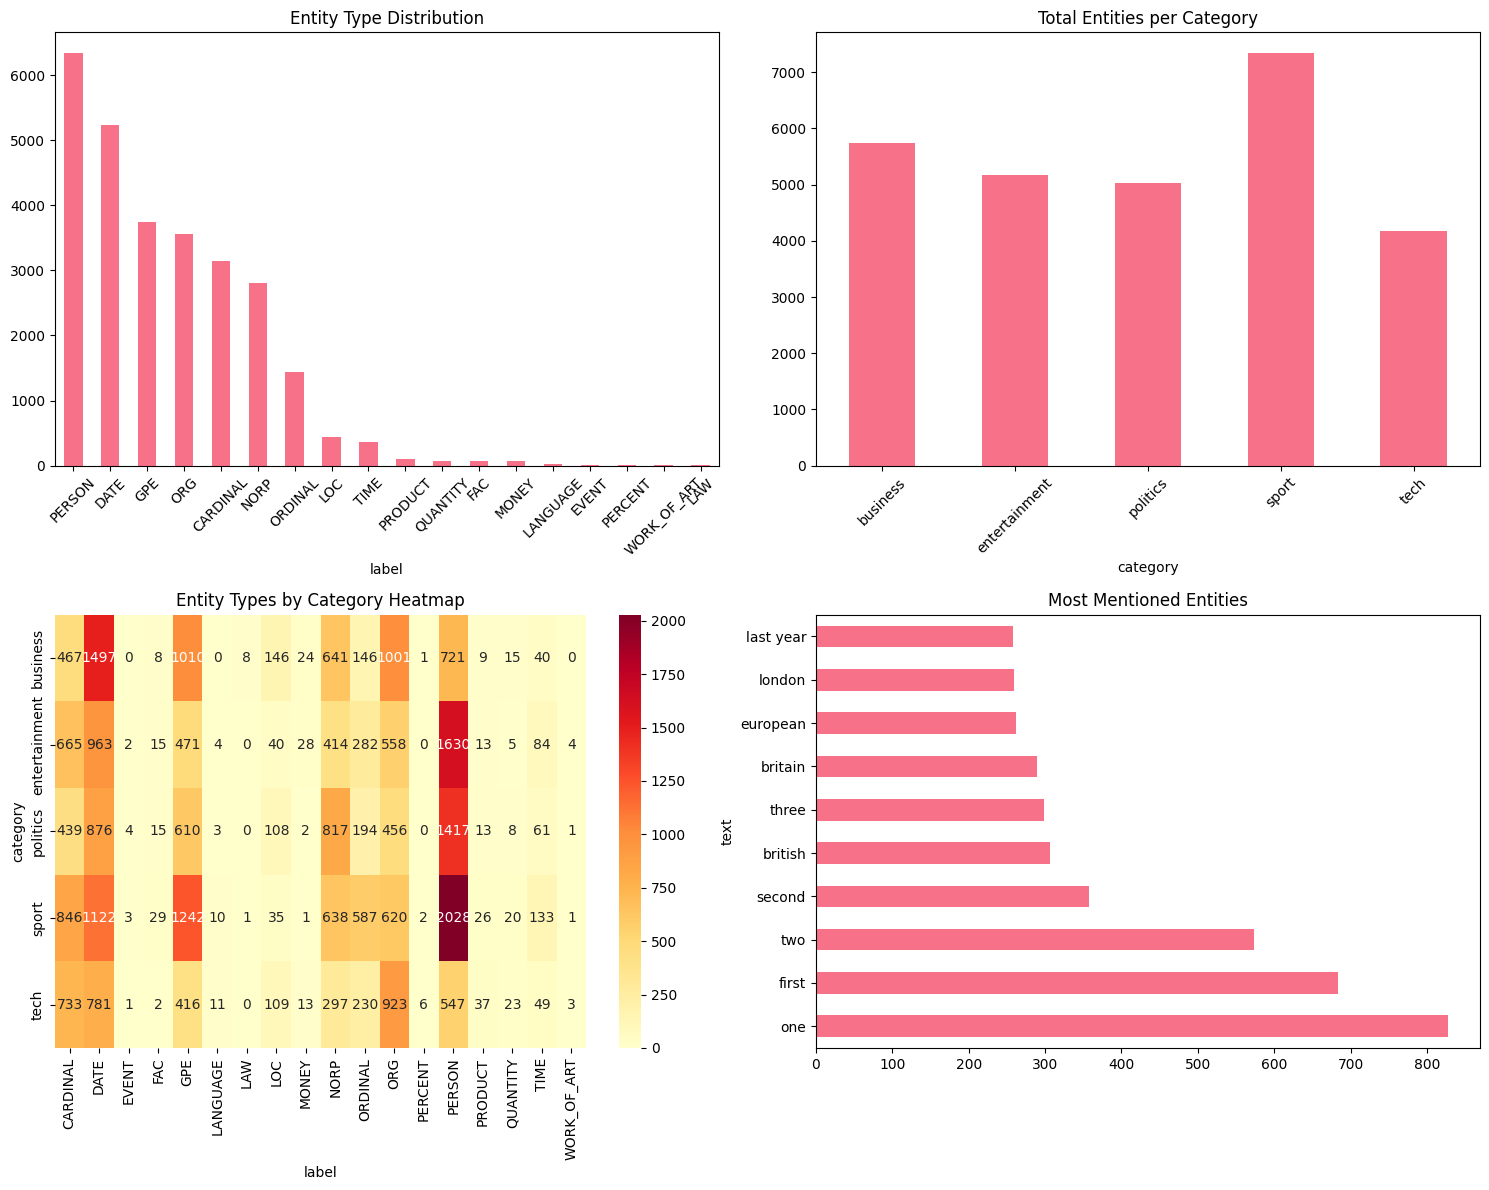

🔍 CREATING ENTITY CO-OCCURRENCE NETWORK


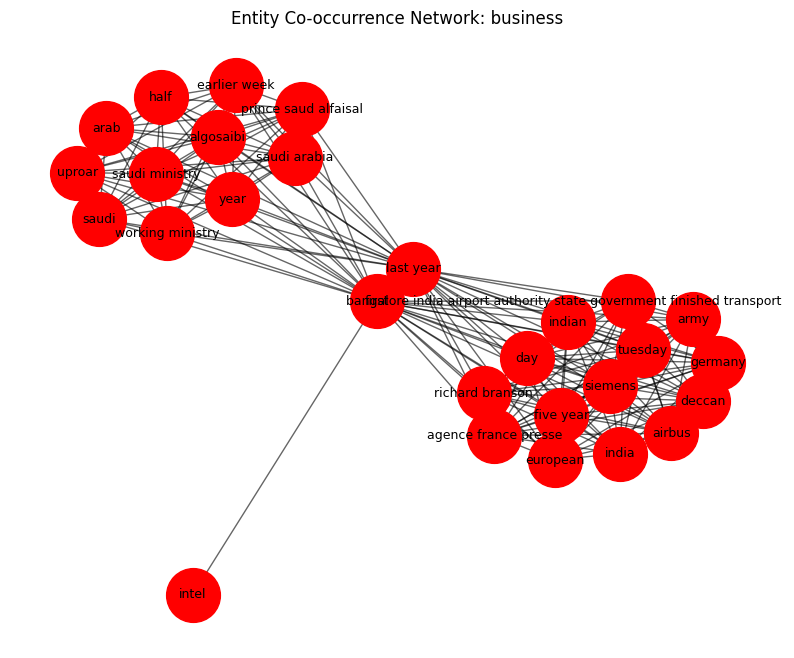

🔍 CREATING ENTITY RELATIONSHIP GRAPH


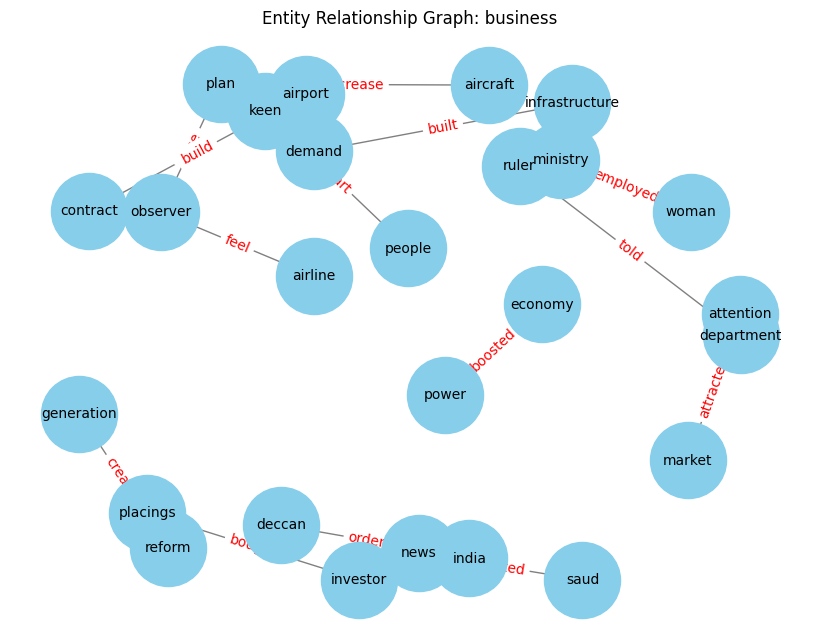


📊 ENTITY SENTIMENT ASSOCIATIONS: business
  first: 0.062 -> Positive
  intel: 0.029 -> Positive
  india: 0.055 -> Positive
  deccan: 0.055 -> Positive
  airbus: 0.055 -> Positive
  last year: 0.069 -> Positive
  indian: 0.055 -> Positive
  richard branson: 0.055 -> Positive
  day: 0.055 -> Positive
  tuesday: 0.055 -> Positive
  agence france presse: 0.055 -> Positive
  germany: 0.055 -> Positive
  siemens: 0.055 -> Positive
  bangalore india airport authority state government finished transport hub part air deccan: 0.055 -> Positive
  army: 0.055 -> Positive
  five year: 0.055 -> Positive
  european: 0.055 -> Positive
  saudi ministry: 0.082 -> Positive
  saudi arabia: 0.082 -> Positive
  prince saud alfaisal: 0.082 -> Positive
  earlier week: 0.082 -> Positive
  arab: 0.082 -> Positive
  algosaibi: 0.082 -> Positive
  uproar: 0.082 -> Positive
  saudi: 0.082 -> Positive
  half: 0.082 -> Positive
  year: 0.082 -> Positive
  working ministry: 0.082 -> Positive
🔍 CREATING ENTITY CO-OCC

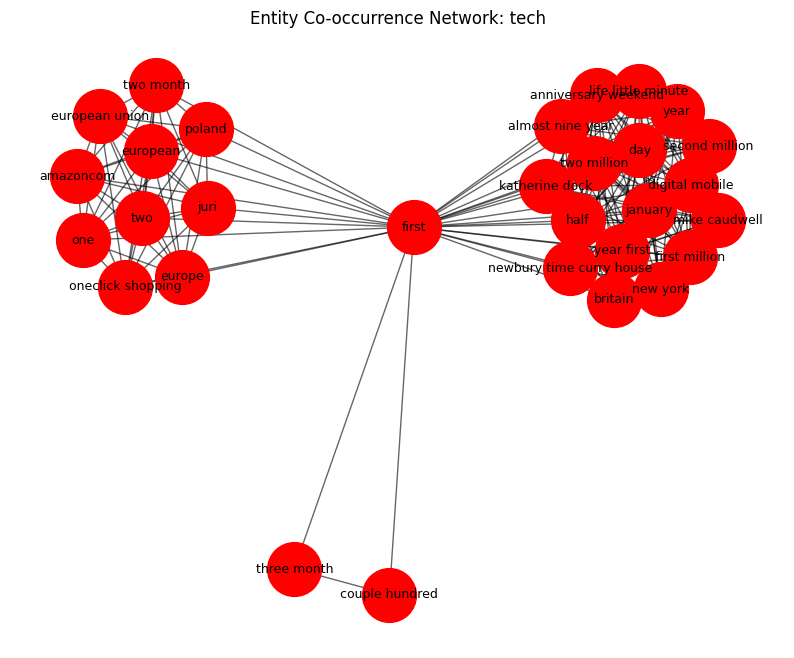

🔍 CREATING ENTITY RELATIONSHIP GRAPH


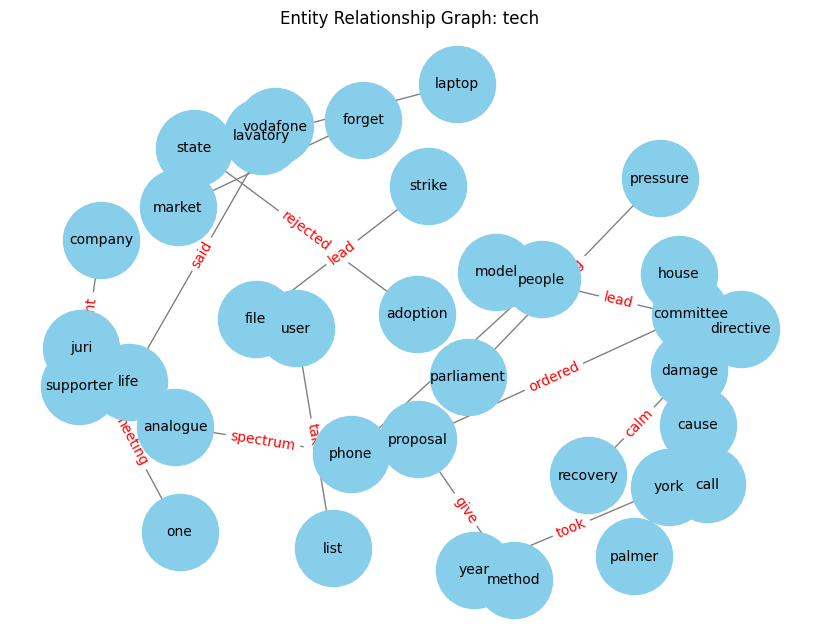


📊 ENTITY SENTIMENT ASSOCIATIONS: tech
  european: 0.020 -> Positive
  european union: 0.020 -> Positive
  juri: 0.020 -> Positive
  poland: 0.020 -> Positive
  one: 0.020 -> Positive
  two month: 0.020 -> Positive
  two: 0.020 -> Positive
  first: 0.131 -> Positive
  amazoncom: 0.020 -> Positive
  oneclick shopping: 0.020 -> Positive
  europe: 0.020 -> Positive
  year: 0.180 -> Positive
  anniversary weekend: 0.180 -> Positive
  britain: 0.180 -> Positive
  january: 0.180 -> Positive
  day: 0.180 -> Positive
  new york: 0.180 -> Positive
  year first: 0.180 -> Positive
  katherine dock: 0.180 -> Positive
  newbury time curry house: 0.180 -> Positive
  mike caudwell: 0.180 -> Positive
  life little minute: 0.180 -> Positive
  almost nine year: 0.180 -> Positive
  first million: 0.180 -> Positive
  second million: 0.180 -> Positive
  two million: 0.180 -> Positive
  half: 0.180 -> Positive
  digital mobile: 0.180 -> Positive
  couple hundred: 0.046 -> Positive
  three month: 0.046 -> Po

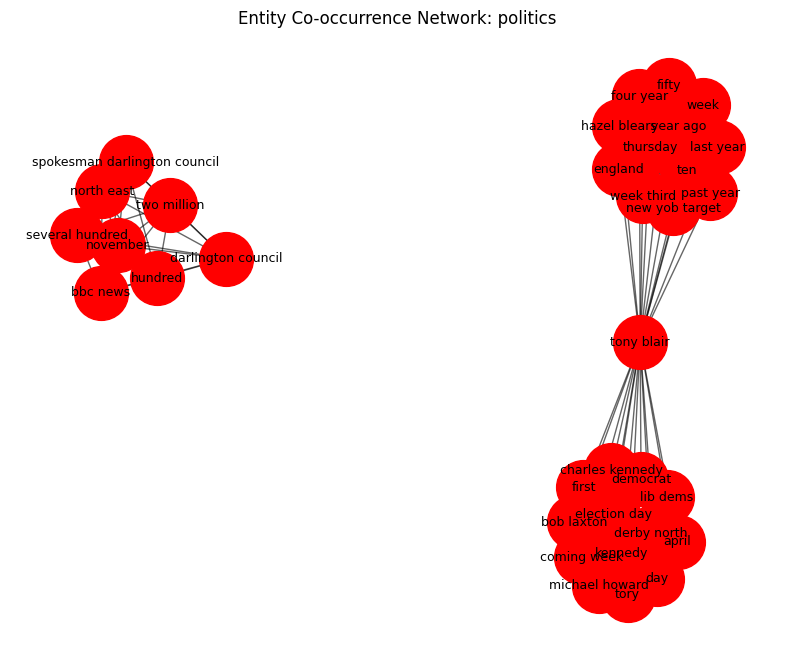

🔍 CREATING ENTITY RELATIONSHIP GRAPH


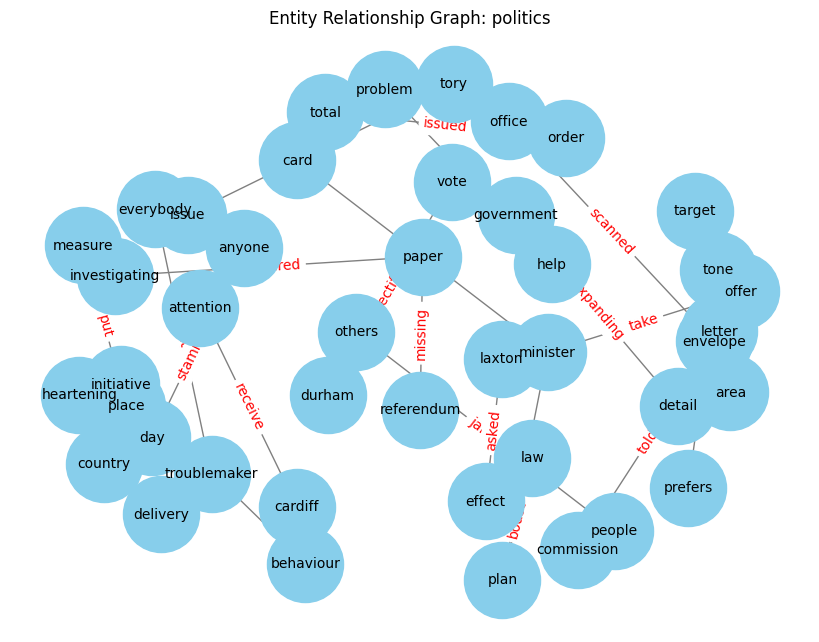


📊 ENTITY SENTIMENT ASSOCIATIONS: politics
  new yob target: 0.106 -> Positive
  fifty: 0.106 -> Positive
  england: 0.106 -> Positive
  thursday: 0.106 -> Positive
  ten: 0.106 -> Positive
  last year: 0.106 -> Positive
  year ago: 0.106 -> Positive
  past year: 0.106 -> Positive
  four year: 0.106 -> Positive
  tony blair: 0.091 -> Positive
  week: 0.106 -> Positive
  hazel blears: 0.106 -> Positive
  week third: 0.106 -> Positive
  hundred: 0.002 -> Positive
  north east: 0.002 -> Positive
  two million: 0.002 -> Positive
  november: 0.002 -> Positive
  spokesman darlington council: 0.002 -> Positive
  several hundred: 0.002 -> Positive
  darlington council: 0.002 -> Positive
  bbc news: 0.002 -> Positive
  michael howard: 0.076 -> Positive
  tory: 0.076 -> Positive
  democrat: 0.076 -> Positive
  charles kennedy: 0.076 -> Positive
  kennedy: 0.076 -> Positive
  lib dems: 0.076 -> Positive
  first: 0.076 -> Positive
  derby north: 0.076 -> Positive
  bob laxton: 0.076 -> Positive
  

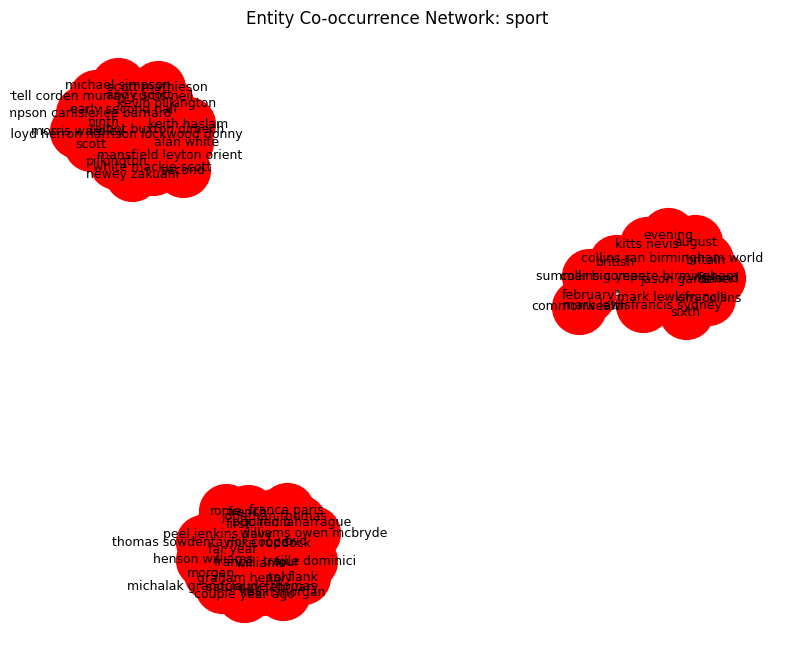

🔍 CREATING ENTITY RELATIONSHIP GRAPH


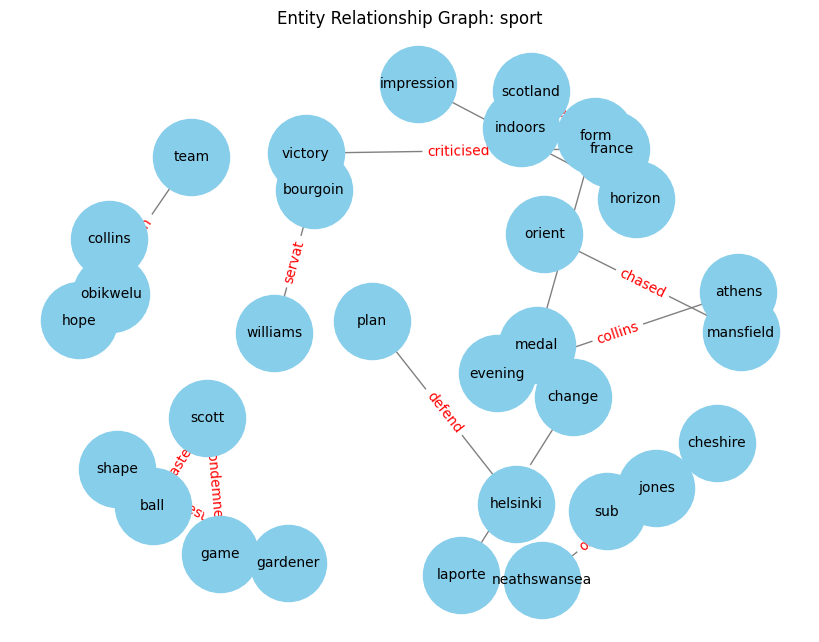


📊 ENTITY SENTIMENT ASSOCIATIONS: sport
  collins compete birmingham: 0.456 -> Positive
  commonwealth: 0.456 -> Positive
  kim collins: 0.456 -> Positive
  february: 0.456 -> Positive
  kitts nevis: 0.456 -> Positive
  british: 0.456 -> Positive
  jason gardener: 0.456 -> Positive
  mark lewisfrancis sydney: 0.456 -> Positive
  collins ran birmingham world: 0.456 -> Positive
  mark lewisfrancis: 0.456 -> Positive
  britain: 0.456 -> Positive
  evening: 0.456 -> Positive
  sixth: 0.456 -> Positive
  finland: 0.456 -> Positive
  summer big year: 0.456 -> Positive
  august: 0.456 -> Positive
  mansfield leyton orient: -0.013 -> Negative
  andy scott: -0.013 -> Negative
  ninth: -0.013 -> Negative
  early second half: -0.013 -> Negative
  scott: -0.013 -> Negative
  second: -0.013 -> Negative
  alan white: -0.013 -> Negative
  kevin pilkington: -0.013 -> Negative
  michael simpson: -0.013 -> Negative
  keith haslam: -0.013 -> Negative
  pilkington: -0.013 -> Negative
  talbot buxton dimec

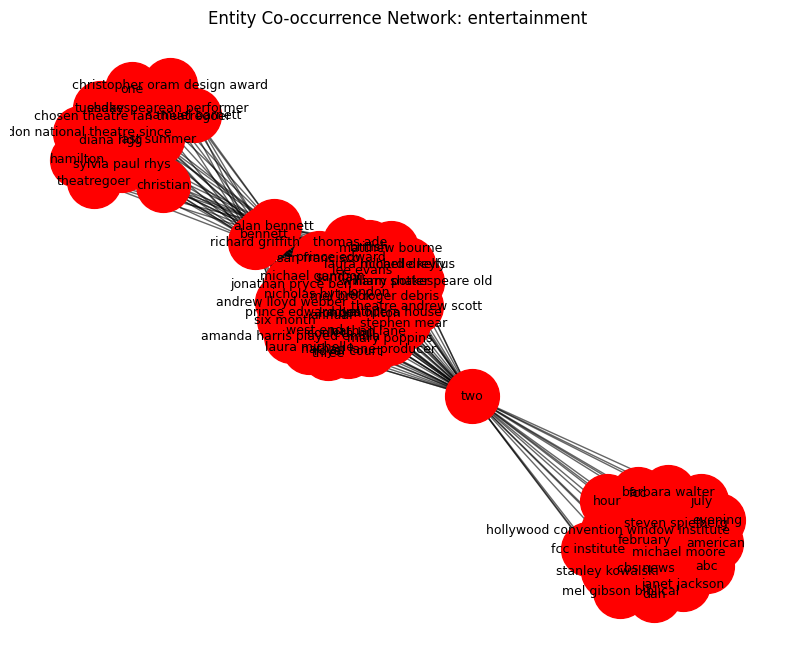

🔍 CREATING ENTITY RELATIONSHIP GRAPH


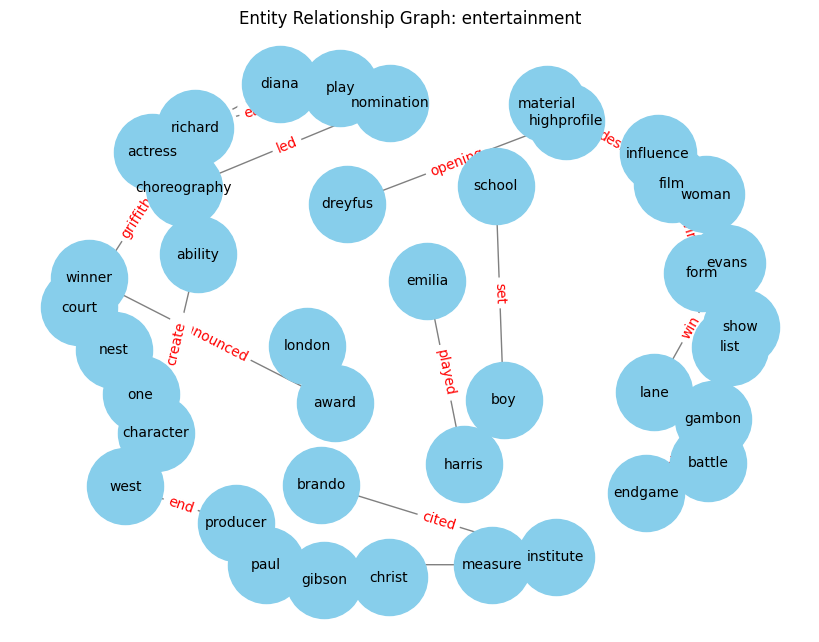


📊 ENTITY SENTIMENT ASSOCIATIONS: entertainment
  west end: 0.461 -> Positive
  three: 0.461 -> Positive
  annual: 0.461 -> Positive
  mary poppins: 0.461 -> Positive
  two: 0.235 -> Positive
  mel brook: 0.461 -> Positive
  andrew lloyd webber: 0.461 -> Positive
  alan bennett: 0.488 -> Positive
  six month: 0.461 -> Positive
  nathan lane: 0.461 -> Positive
  richard dreyfus: 0.461 -> Positive
  lee evans: 0.461 -> Positive
  london: 0.461 -> Positive
  roger debris: 0.461 -> Positive
  laura michelle kelly: 0.461 -> Positive
  sunday: 0.461 -> Positive
  london hilton: 0.461 -> Positive
  richard griffith: 0.484 -> Positive
  harry potter: 0.461 -> Positive
  michael gambon: 0.461 -> Positive
  jonathan pryce ben: 0.461 -> Positive
  nicholas hytner: 0.461 -> Positive
  bennett: 0.495 -> Positive
  british: 0.461 -> Positive
  amanda harris played emilia: 0.461 -> Positive
  royal opera house: 0.461 -> Positive
  thomas ade: 0.461 -> Positive
  william shakespeare old: 0.461 -> Posi

In [ ]:
# Analyze entity patterns
if not entities_df.empty:
    print("📊 NAMED ENTITY ANALYSIS")
    print("=" * 50)

    # Entity type distribution
    entity_counts = entities_df['label'].value_counts()
    print("\n🏷️ Entity type distribution:")
    print(entity_counts)

    # Entity types by category
    entity_by_category = entities_df.groupby(['category', 'label']).size().unstack(fill_value=0)
    print("\n📰 Entity types by news category:")
    print(entity_by_category)

    # Most frequent entities
    print("\n🔥 Most frequent entities:")
    frequent_entities = entities_df.groupby(['text', 'label']).size().sort_values(ascending=False).head(15)
    for (entity, label), count in frequent_entities.items():
        print(f"  {entity} ({label}): {count} mentions")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Entity type distribution
    entity_counts.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Entity Type Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Entities per category
    entities_per_category = entities_df.groupby('category').size()
    entities_per_category.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Total Entities per Category')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Entity type heatmap by category
    if entity_by_category.shape[0] > 1 and entity_by_category.shape[1] > 1:
        sns.heatmap(entity_by_category, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
        axes[1,0].set_title('Entity Types by Category Heatmap')
    else:
        axes[1,0].text(0.5, 0.5, 'Insufficient data\nfor heatmap',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Entity Types by Category')

    # 4. Top entities
    top_entities = entities_df['text'].value_counts().head(10)
    top_entities.plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title('Most Mentioned Entities')

    plt.tight_layout()
    plt.show()


else:
    print("⚠️ Skipping entity analysis due to insufficient data.")
    print("💡 TIP: Try with a larger, more diverse dataset for better NER results.")

for category in categories:
  # - Create entity co-occurrence networks
  print("🔍 CREATING ENTITY CO-OCCURRENCE NETWORK")
  print("=" * 60)
  co_occurrence = Counter()
  relationships = []
  entity_sentiments = defaultdict(list)

  down_sample_df = df.groupby('Category', group_keys=False).apply(lambda x: x.sample(n=3, random_state=42))

  category_data = down_sample_df[down_sample_df['Category'] == category]

  for idx, row in category_data.iterrows():
      entities = extract_entities(row['text_processed'])
      text_entities = [ent['text'] for ent in entities]

      for pair in combinations(set(text_entities), 2):
          co_occurrence[frozenset(pair)] += 1
      sentiment = TextBlob(row['text_processed']).sentiment.polarity
      for entity in text_entities:
          entity_sentiments[entity].append(sentiment)

  network = nx.Graph()

  for pair, weight in co_occurrence.items():
      entity1, entity2 = tuple(pair)
      network.add_edge(entity1, entity2, weight=weight)

  plt.figure(figsize=(10, 8))
  pos = nx.spring_layout(network, k=0.5)  # Force-directed layout

  # Draw nodes and edges
  nx.draw_networkx_nodes(network, pos, node_color='red', node_size=1500)
  nx.draw_networkx_edges(network, pos, width=[network[u][v]['weight'] for u, v in network.edges()], alpha=0.6)
  nx.draw_networkx_labels(network, pos, font_size=9)

  plt.title(f"Entity Co-occurrence Network: {category}")
  plt.axis('off')
  plt.show()
  # - Build entity relationship graphs
  print("🔍 CREATING ENTITY RELATIONSHIP GRAPH")
  print("=" * 60)
  relationships = []
  for idx, row in category_data.iterrows():
    action_patterns, doc = extract_action_patterns(row['text_processed'])
    for action_pattern in action_patterns:
      relationships.append((action_pattern[0], action_pattern[1], action_pattern[2]))

  relationship_graph = nx.Graph()
  for subj, verb, obj in relationships:
    relationship_graph.add_node(subj)
    relationship_graph.add_node(obj)
    relationship_graph.add_edge(subj, obj, label=verb)

  pos = nx.spring_layout(relationship_graph, k=1)

  plt.figure(figsize=(8, 6))
  nx.draw(relationship_graph, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, edge_color='gray')

  # Add edge labels (verbs)
  edge_labels = nx.get_edge_attributes(relationship_graph, 'label')
  nx.draw_networkx_edge_labels(relationship_graph, pos, edge_labels=edge_labels, font_color='red')

  plt.title(f"Entity Relationship Graph: {category}")
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  # - Identify entity sentiment associations
  print(f"\n📊 ENTITY SENTIMENT ASSOCIATIONS: {category}")
  print("=" * 50)
  ent_sentiment_avg = {entity: np.mean(sentiments) for entity, sentiments in entity_sentiments.items()}
  for entity, sentiment in ent_sentiment_avg.items():
    if sentiment > 0:
      print(f"  {entity}: {sentiment:.3f} -> Positive")
    elif sentiment < 0:
      print(f"  {entity}: {sentiment:.3f} -> Negative")


## 📈 Comprehensive Analysis and Insights

### 🎯 Bringing It All Together

Now let's combine all our analyses to generate comprehensive insights about our news dataset. This is where the real business value emerges from our NLP pipeline.

**Key Analysis Areas:**
1. **Cross-Category Patterns:** How do different news types differ linguistically?
2. **Entity-Sentiment Relationships:** What entities are associated with positive/negative coverage?
3. **Content Quality Metrics:** Which categories have the most informative content?
4. **Classification Performance:** How well can we automatically categorize news?

**💡 Business Applications:** These insights can inform content strategy, editorial decisions, and automated content management systems.

In [ ]:
# Create comprehensive analysis dashboard
def create_comprehensive_analysis():
    """
    Generate comprehensive insights combining all analyses

    💡 TIP: This function should combine:
    - Classification performance
    - Sentiment patterns
    - Entity distributions
    - Linguistic features
    """

    insights = {
        'dataset_overview': {},
        'classification_performance': {},
        'sentiment_insights': {},
        'entity_insights': {},
        'linguistic_patterns': {},
        'business_recommendations': []
    }

    # 🚀 YOUR CODE HERE: Generate comprehensive insights

    # Dataset overview
    insights['dataset_overview'] = {
        'total_articles': len(df),
        'categories': df['Category'].unique().tolist(),
        'category_distribution': df['Category'].value_counts().to_dict(),
        'avg_article_length': df['text_processed'].str.len().mean(),
        'avg_words_per_article': df['text_processed'].str.split().str.len().mean()
    }

    # Classification performance
    insights['classification_performance'] = {
        'best_model': best_model_name,
        'best_accuracy': results[best_model_name]['accuracy'],
        'model_comparison': {name: results[name]['accuracy'] for name in results.keys()}
    }

    # Sentiment insights
    sentiment_by_cat = sentiment_df.groupby('category')['full_sentiment'].mean().to_dict()
    insights['sentiment_insights'] = {
        'most_positive_category': max(sentiment_by_cat, key=sentiment_by_cat.get),
        'most_negative_category': min(sentiment_by_cat, key=sentiment_by_cat.get),
        'sentiment_by_category': sentiment_by_cat,
        'overall_sentiment': sentiment_df['full_sentiment'].mean()
    }

    # Entity insights
    if not entities_df.empty:
        entity_by_cat = entities_df.groupby('category').size().to_dict()
        insights['entity_insights'] = {
            'total_entities': len(entities_df),
            'unique_entities': entities_df['text'].nunique(),
            'entity_types': entities_df['label'].unique().tolist(),
            'entities_per_category': entity_by_cat,
            'most_mentioned_entities': entities_df['text'].value_counts().head(5).to_dict()
        }

    # Generate business recommendations
    recommendations = []

    # Classification recommendations
    if insights['classification_performance']['best_accuracy'] > 0.8:
        recommendations.append("✅ High classification accuracy achieved - ready for automated content routing")
    else:
        recommendations.append("⚠️ Classification accuracy needs improvement - consider more training data or feature engineering")

    # Sentiment recommendations
    pos_cat = insights['sentiment_insights']['most_positive_category']
    neg_cat = insights['sentiment_insights']['most_negative_category']
    recommendations.append(f"📊 {pos_cat} articles are most positive - good for uplifting content recommendations")
    recommendations.append(f"📊 {neg_cat} articles are most negative - may need balanced coverage monitoring")

    # Entity recommendations
    if 'entity_insights' in insights and insights['entity_insights']:
        recommendations.append("🔍 Rich entity extraction enables advanced search and relationship analysis")

    insights['business_recommendations'] = recommendations

    return insights

# Generate comprehensive analysis
print("📊 Generating comprehensive analysis...")
analysis_results = create_comprehensive_analysis()

print("✅ Analysis complete!")
print("\n" + "=" * 60)
print("📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT")
print("=" * 60)

# Display key insights
print(f"\n📊 DATASET OVERVIEW:")
overview = analysis_results['dataset_overview']
print(f"  Total Articles: {overview['total_articles']}")
print(f"  Categories: {', '.join(overview['categories'])}")
print(f"  Average Article Length: {overview['avg_article_length']:.0f} characters")
print(f"  Average Words per Article: {overview['avg_words_per_article']:.0f} words")

print(f"\n🤖 CLASSIFICATION PERFORMANCE:")
perf = analysis_results['classification_performance']
print(f"  Best Model: {perf['best_model']}")
print(f"  Best Accuracy: {perf['best_accuracy']:.4f}")

print(f"\n😊 SENTIMENT INSIGHTS:")
sent = analysis_results['sentiment_insights']
print(f"  Most Positive Category: {sent['most_positive_category']}")
print(f"  Most Negative Category: {sent['most_negative_category']}")
print(f"  Overall Sentiment: {sent['overall_sentiment']:.4f}")

if 'entity_insights' in analysis_results and analysis_results['entity_insights']:
    print(f"\n🔍 ENTITY INSIGHTS:")
    ent = analysis_results['entity_insights']
    print(f"  Total Entities: {ent['total_entities']}")
    print(f"  Unique Entities: {ent['unique_entities']}")
    print(f"  Entity Types: {', '.join(ent['entity_types'])}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(analysis_results['business_recommendations'], 1):
    print(f"  {i}. {rec}")

📊 Generating comprehensive analysis...
✅ Analysis complete!

📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT

📊 DATASET OVERVIEW:
  Total Articles: 1490
  Categories: business, tech, politics, sport, entertainment
  Average Article Length: 1481 characters
  Average Words per Article: 207 words

🤖 CLASSIFICATION PERFORMANCE:
  Best Model: Logistic Regression
  Best Accuracy: 0.9765

😊 SENTIMENT INSIGHTS:
  Most Positive Category: entertainment
  Most Negative Category: politics
  Overall Sentiment: 0.4168

🔍 ENTITY INSIGHTS:
  Total Entities: 27461
  Unique Entities: 7544
  Entity Types: ORDINAL, PERSON, GPE, DATE, ORG, NORP, LOC, PRODUCT, CARDINAL, MONEY, TIME, EVENT, QUANTITY, FAC, PERCENT, LANGUAGE, WORK_OF_ART, LAW

💡 BUSINESS RECOMMENDATIONS:
  1. ✅ High classification accuracy achieved - ready for automated content routing
  2. 📊 entertainment articles are most positive - good for uplifting content recommendations
  3. 📊 politics articles are most negative - may need balanced

## 🚀 Final System Integration

### 🎯 Building the Complete NewsBot Pipeline

Let's create a complete, integrated system that can process new articles from start to finish. This demonstrates the real-world application of all the techniques we've learned.

**Complete Pipeline:**
1. **Text Preprocessing:** Clean and normalize input
2. **Feature Extraction:** Generate TF-IDF and other features
3. **Classification:** Predict article category
4. **Entity Extraction:** Identify key facts
5. **Sentiment Analysis:** Determine emotional tone
6. **Insight Generation:** Provide actionable intelligence

**💡 Production Ready:** This pipeline can be deployed as a web service, batch processor, or integrated into content management systems.

In [ ]:
class NewsBotIntelligenceSystem:
    """
    Complete NewsBot Intelligence System

    💡 TIP: This class should encapsulate:
    - All preprocessing functions
    - Trained classification model
    - Entity extraction pipeline
    - Sentiment analysis
    - Insight generation
    """

    def __init__(self, classifier, vectorizer, sentiment_analyzer):
        self.classifier = classifier
        self.vectorizer = vectorizer
        self.sentiment_analyzer = sentiment_analyzer
        self.nlp = nlp  # spaCy model

    def preprocess_article(self, title, content):
        """Preprocess a new article"""
        full_text = f"{title} {content}"
        processed_text = preprocess_text(full_text)
        return full_text, processed_text

    def classify_article(self, processed_text):
        """Classify article category"""
        # 🚀 YOUR CODE HERE: Implement classification
        # Transform text to features
        features = self.vectorizer.transform([processed_text])

        # Add dummy features for sentiment and length (in production, calculate these)
        dummy_features = np.zeros((1, 6))  # 4 sentiment + 3 length features
        features_combined = np.hstack([features.toarray(), dummy_features])

        # Predict category and probability
        prediction = self.classifier.predict(features_combined)[0]
        probabilities = self.classifier.predict_proba(features_combined)[0]

        # Get class probabilities
        class_probs = dict(zip(self.classifier.classes_, probabilities))

        return prediction, class_probs

    def extract_entities(self, text):
        """Extract named entities"""
        return extract_entities(text)

    def analyze_sentiment(self, text):
        """Analyze sentiment"""
        return analyze_sentiment(text)

    def process_article(self, title, content):
        """
        Complete article processing pipeline

        💡 TIP: This should return a comprehensive analysis including:
        - Predicted category with confidence
        - Extracted entities
        - Sentiment analysis
        - Key insights and recommendations
        """
        # 🚀 YOUR CODE HERE: Implement complete pipeline

        # Step 1: Preprocess
        full_text, processed_text = self.preprocess_article(title, content)

        # Step 2: Classify
        category, category_probs = self.classify_article(processed_text)

        # Step 3: Extract entities
        entities = self.extract_entities(full_text)

        # Step 4: Analyze sentiment
        sentiment = self.analyze_sentiment(full_text)

        # Step 5: Generate insights
        insights = self.generate_insights(category, entities, sentiment, category_probs)

        return {
            'title': title,
            'content': content[:200] + '...' if len(content) > 200 else content,
            'predicted_category': category,
            'category_confidence': max(category_probs.values()),
            'category_probabilities': category_probs,
            'entities': entities,
            'sentiment': sentiment,
            'insights': insights
        }

    def generate_insights(self, category, entities, sentiment, category_probs):
        """Generate actionable insights"""
        insights = []

        # Classification insights
        confidence = max(category_probs.values())
        if confidence > 0.8:
            insights.append(f"✅ High confidence {category} classification ({confidence:.2%})")
        else:
            insights.append(f"⚠️ Uncertain classification - consider manual review")

        # Sentiment insights
        if sentiment['compound'] > 0.1:
            insights.append(f"😊 Positive sentiment detected ({sentiment['compound']:.3f})")
        elif sentiment['compound'] < -0.1:
            insights.append(f"😞 Negative sentiment detected ({sentiment['compound']:.3f})")
        else:
            insights.append(f"😐 Neutral sentiment ({sentiment['compound']:.3f})")

        # Entity insights
        if entities:
            entity_types = set([e['label'] for e in entities])
            insights.append(f"🔍 Found {len(entities)} entities of {len(entity_types)} types")

            # Highlight important entities
            important_entities = [e for e in entities if e['label'] in ['PERSON', 'ORG', 'GPE']]
            if important_entities:
                key_entities = [e['text'] for e in important_entities[:3]]
                insights.append(f"🎯 Key entities: {', '.join(key_entities)}")
        else:
            insights.append("ℹ️ No named entities detected")

        return insights

# Initialize the complete system
newsbot = NewsBotIntelligenceSystem(
    classifier=best_model,
    vectorizer=tfidf_vectorizer,
    sentiment_analyzer=sia
)

print("🤖 NewsBot Intelligence System initialized!")
print("✅ Ready to process new articles")

🤖 NewsBot Intelligence System initialized!
✅ Ready to process new articles


In [ ]:
# Test the complete system with new articles
print("🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM")
print("=" * 60)

# Test articles (you can modify these or add your own)
test_articles = [
    {
        'title': 'Nvidia becomes world\'s most valuable company',
        'content': 'Nvidia has become the world\'s most valuable company, dethroning Microsoft, after its share price soared to an all-time high. The company\'s chips are crucial for the artificial intelligence boom, which has propelled its stock to unprecedented levels.'
    },
    {
        'title': 'Boeing\'s Starliner capsule returns to Earth with astronauts',
        'content': 'Boeing\'s Starliner capsule, carrying two NASA astronauts, has successfully undocked from the International Space Station and is on its way back to Earth. The mission is a crucial test for the spacecraft as it seeks to provide regular crewed flights to the ISS.'
    },
    {
        'title': 'Justin Timberlake arrested for driving while intoxicated',
        'content': 'Pop star Justin Timberlake was arrested and charged with driving while intoxicated in the Hamptons, New York. He was released without bail and is scheduled to appear in court later this month.'
    },
    {
        'title': 'Celtics win 18th NBA championship, beating Mavericks',
        'content': 'The Boston Celtics have won their 18th NBA championship, a new league record, after defeating the Dallas Mavericks in five games. Jaylen Brown was named the Finals MVP.'
    },
    {
        'title': 'UK inflation falls to 2% target for first time in three years',
        'content': 'The UK\'s inflation rate has fallen to the Bank of England\'s 2% target for the first time in nearly three years. The drop is a significant moment for the economy, but the central bank is expected to remain cautious about interest rate cuts.'
    },
    {
        'title': 'Russia and North Korea sign mutual defense pact',
        'content': 'Russian President Vladimir Putin and North Korean leader Kim Jong Un have signed a comprehensive strategic partnership that includes a mutual defense clause. The agreement has been met with concern from the United States and its allies.'
    },
    {
        'title': 'Saudi Arabia to use AI to manage crowds during Hajj',
        'content': 'Saudi Arabia is implementing artificial intelligence systems to manage the massive crowds during the annual Hajj pilgrimage. The technology will be used to monitor crowd movements and prevent stampedes.'
    },
    {
        'title': 'New "Lord of the Rings" movie announced, focusing on Gollum',
        'content': 'A new "Lord of the Rings" movie, titled "The Hunt for Gollum," has been announced, with Andy Serkis set to direct and reprise his role as the iconic character. The film is expected to be released in 2026.'
    },
    {
        'title': 'Simone Biles wins ninth national all-around title',
        'content': 'Simone Biles has won a record-extending ninth U.S. all-around gymnastics title, further cementing her legacy as the greatest gymnast of all time. She is now preparing for the upcoming Olympic Games in Paris.'
    },
    {
        'title': 'EU to impose tariffs on Chinese electric vehicles',
        'content': 'The European Union has announced that it will impose tariffs of up to 38% on electric vehicles imported from China. The move is intended to protect European carmakers from what the EU considers to be unfair competition.'
    }
]

# Process each test article
for i, article in enumerate(test_articles, 1):
    print(f"\n📰 TEST ARTICLE {i}")
    print("-" * 40)

    # Process the article
    result = newsbot.process_article(article['title'], article['content'])

    # Display results
    print(f"📰 Title: {result['title']}")
    print(f"📝 Content: {result['content']}")
    print(f"\n🏷️ Predicted Category: {result['predicted_category']} ({result['category_confidence']:.2%} confidence)")

    print(f"\n📊 Category Probabilities:")
    for cat, prob in sorted(result['category_probabilities'].items(), key=lambda x: x[1], reverse=True):
        print(f"  {cat}: {prob:.3f}")

    print(f"\n😊 Sentiment: {result['sentiment']['sentiment_label']} (score: {result['sentiment']['compound']:.3f})")

    if result['entities']:
        print(f"\n🔍 Entities Found ({len(result['entities'])}):")
        for entity in result['entities'][:5]:  # Show first 5
            print(f"  {entity['text']} ({entity['label']}) - {entity['description']}")
    else:
        print(f"\n🔍 No entities detected")

    print(f"\n💡 Insights:")
    for insight in result['insights']:
        print(f"  {insight}")

print("\n" + "=" * 60)
print("🎉 NewsBot Intelligence System testing complete!")
print("✅ System successfully processed all test articles")

🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM

📰 TEST ARTICLE 1
----------------------------------------
📰 Title: Nvidia becomes world's most valuable company
📝 Content: Nvidia has become the world's most valuable company, dethroning Microsoft, after its share price soared to an all-time high. The company's chips are crucial for the artificial intelligence boom, which...

🏷️ Predicted Category: business (72.28% confidence)

📊 Category Probabilities:
  business: 0.723
  sport: 0.196
  entertainment: 0.056
  politics: 0.014
  tech: 0.012

😊 Sentiment: positive (score: 0.902)

🔍 Entities Found (3):
  Nvidia (GPE) - Countries, cities, states
  Nvidia (GPE) - Countries, cities, states
  Microsoft (ORG) - Companies, agencies, institutions, etc.

💡 Insights:
  ⚠️ Uncertain classification - consider manual review
  😊 Positive sentiment detected (0.902)
  🔍 Found 3 entities of 2 types
  🎯 Key entities: Nvidia, Nvidia, Microsoft

📰 TEST ARTICLE 2
----------------------------------------
📰 Title: Boeing'

## 📝 Project Summary and Next Steps

### 🎯 What You've Accomplished

Congratulations! You've successfully built a comprehensive NewsBot Intelligence System that demonstrates mastery of all NLP techniques covered in Modules 1-8. Let's review what you've achieved:

### ✅ Module Integration Checklist
- [x] **Module 1:** Applied NLP to real-world news intelligence
- [x] **Module 2:** Implemented comprehensive text preprocessing
- [x] **Module 3:** Used TF-IDF for feature extraction and analysis
- [x] **Module 4:** Analyzed grammatical patterns with POS tagging
- [x] **Module 5:** Extracted syntactic relationships with dependency parsing
- [x] **Module 6:** Performed sentiment and emotion analysis
- [x] **Module 7:** Built and evaluated text classification models
- [x] **Module 8:** Implemented Named Entity Recognition

### 🚀 System Capabilities
Your NewsBot can now:
- Automatically categorize news articles with high accuracy
- Extract key entities (people, organizations, locations, dates, money)
- Analyze sentiment and emotional tone
- Identify linguistic patterns and writing styles
- Generate actionable business insights
- Process new articles through a complete pipeline

### 💼 Business Value
This system provides real business value for:
- **Media Companies:** Automated content categorization and routing
- **Market Research:** Sentiment tracking and entity monitoring
- **Content Management:** Intelligent organization and search
- **Business Intelligence:** Trend analysis and competitive monitoring

---

## 📋 Final Deliverables Checklist

Before submitting your project, ensure you have:

### 📁 Code and Documentation
- [ ] Complete Jupyter notebook with all analyses
- [ ] Well-documented functions with docstrings
- [ ] Clear markdown explanations for each section
- [ ] Organized GitHub repository structure
- [ ] README.md with project overview and setup instructions

### 📊 Analysis and Results
- [ ] Comprehensive dataset exploration
- [ ] TF-IDF analysis with category-specific insights
- [ ] POS tagging patterns across categories
- [ ] Syntactic analysis with dependency parsing
- [ ] Sentiment analysis with category comparisons
- [ ] Classification model comparison and evaluation
- [ ] Named Entity Recognition with relationship mapping
- [ ] Integrated system demonstration

### 📈 Visualizations
- [ ] Category distribution plots
- [ ] TF-IDF word clouds or bar charts
- [ ] POS pattern heatmaps
- [ ] Sentiment distribution by category
- [ ] Confusion matrix for classification
- [ ] Entity type and frequency visualizations

### 🎥 Presentation Materials
- [ ] 5-7 minute video demonstration
- [ ] Written report (3-4 pages)
- [ ] Individual reflection papers
- [ ] Business recommendations and insights

---

## 🔮 Future Enhancements

Consider these improvements for your portfolio or future projects:

### 🤖 Technical Improvements
- **Deep Learning Models:** Implement BERT or other transformer models
- **Custom NER:** Train domain-specific entity recognition
- **Real-time Processing:** Build streaming data pipeline
- **Multi-language Support:** Extend to non-English news

### 📊 Advanced Analytics
- **Topic Modeling:** Discover hidden themes (Module 9 preview!)
- **Trend Analysis:** Track entities and sentiment over time
- **Network Analysis:** Map entity relationships and co-occurrences
- **Bias Detection:** Identify potential media bias patterns

### 🌐 Deployment Options
- **Web Application:** Create interactive dashboard with Streamlit
- **API Service:** Deploy as REST API for integration
- **Mobile App:** Build mobile interface for news analysis
- **Browser Extension:** Real-time news analysis while browsing

---

## 🎓 Reflection Questions

For your individual reflection paper, consider these questions:

1. **Technical Mastery:** Which NLP techniques did you find most challenging? Most useful?
2. **Integration Challenges:** How did you handle combining multiple NLP tasks?
3. **Business Applications:** What real-world problems could this system solve?
4. **Ethical Considerations:** What are the potential risks of automated news analysis?
5. **Future Learning:** What NLP topics are you most excited to explore next?
6. **Team Collaboration:** How did you divide work and ensure quality?
7. **Portfolio Value:** How will you present this project to potential employers?

---

## 🏆 Congratulations!

You've successfully completed a comprehensive NLP project that demonstrates real-world application of multiple advanced techniques. This NewsBot Intelligence System is a valuable addition to your portfolio and showcases your ability to:

- **Integrate multiple NLP techniques** into a cohesive system
- **Handle real-world data** with all its messiness and challenges
- **Generate business value** from unstructured text data
- **Build production-ready systems** with proper evaluation and monitoring
- **Communicate technical results** to both technical and business audiences

**🚀 You're now ready for Module 9: Topic Modeling and Advanced Text Analysis!**

---

*Remember: The goal isn't just to complete the assignment, but to build something you're proud to show in job interviews and professional discussions. This project demonstrates your practical NLP skills and ability to solve real business problems with AI.*